Section 1 Question B

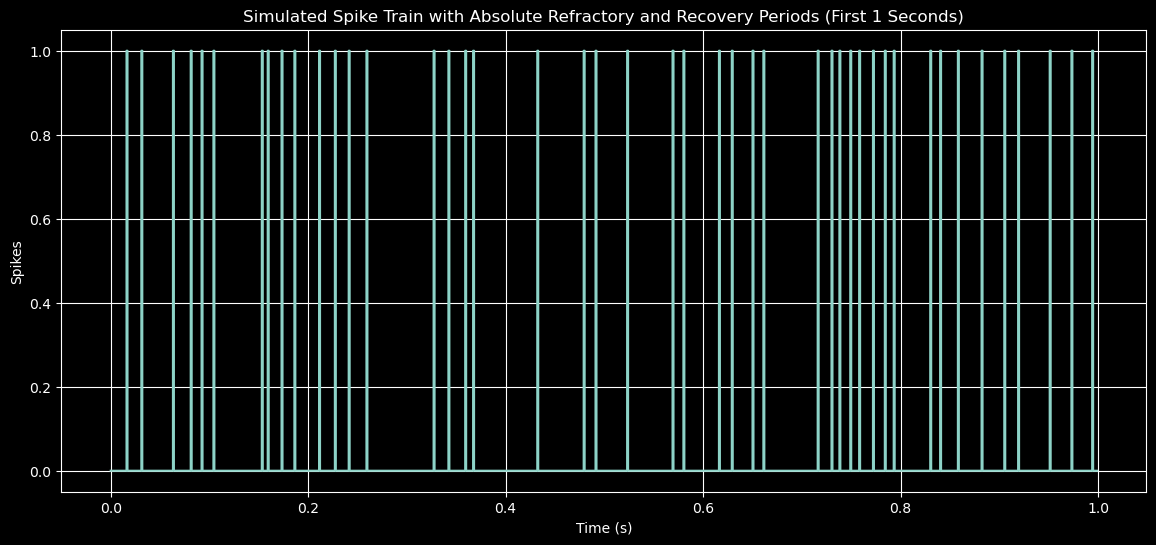

Average firing rate: 47.08 spikes/second
Number of spikes in the first second: 45.0
Minimum interspike interval: 0.006000 seconds


In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
r0 = 55  # Baseline firing rate in spikes per second
duration = 90  # Duration of simulation in seconds
bin_size = 0.001  # Bin size in seconds (1 ms bins)
num_bins = int(duration / bin_size)  # Total number of bins

# Generate spike times
spike_times = np.cumsum(np.random.exponential(1 / r0, int(duration * r0 * 2)))
spike_times = spike_times[spike_times < duration]

# Generate spike train
spike_train_1 = np.zeros(num_bins)
bin_edges = np.arange(0, duration + bin_size, bin_size)
spike_indices = np.digitize(spike_times, bin_edges) - 1

# Ensure the indices are within the valid range
spike_indices = spike_indices[spike_indices < num_bins]

# Populate the spike train
spike_train_1[spike_indices] = 1

# Apply the absolute refractory period of 5 ms
refractory_period = int(0.005 / bin_size)  # Convert 5 ms to bins
recovery_period = int(0.006 / bin_size)  # Convert 6 ms to bins

for i in range(num_bins):
    if spike_train_1[i] == 1:
        # Ensure we don't go out of bounds
        end_refractory = min(i + 1 + refractory_period, num_bins)
        # Set the next 5 ms to 0
        spike_train_1[i + 1:end_refractory] = 0

        # Apply the recovery period: increasing firing rate for the next 6 ms
        for j in range(1, recovery_period + 1):
            if end_refractory + j < num_bins:
                adjusted_rate = r0 * (j / recovery_period)
                if np.random.rand() < (adjusted_rate * bin_size):
                    spike_train_1[end_refractory + j] = 1

# Ensure no overflow beyond the array length
spike_train_1 = spike_train_1[:num_bins]

# Plot the spike train (first 10 seconds for visualization)
plot_duration = 1  # seconds to plot
plot_num_bins = int(plot_duration / bin_size)
plt.style.use('dark_background')
plt.figure(figsize=(14, 6))
plt.plot(np.arange(plot_num_bins) * bin_size, spike_train_1[:plot_num_bins], drawstyle='steps-pre')
plt.title('Simulated Spike Train with Absolute Refractory and Recovery Periods (First 1 Seconds)')
plt.xlabel('Time (s)')
plt.ylabel('Spikes')
plt.grid(True)
plt.show()

# Calculate the total number of spikes
total_spikes = np.sum(spike_train_1)

# Calculate the average firing rate
average_firing_rate = total_spikes / duration
print(f"Average firing rate: {average_firing_rate:.2f} spikes/second")

# Count the number of spikes in the first second
first_second_spikes = np.sum(spike_train_1[:int(1 / bin_size)])
print(f"Number of spikes in the first second: {first_second_spikes}")

# Calculate the minimum interspike interval (ISI)
spike_times = np.where(spike_train_1 == 1)[0]
interspike_intervals = np.diff(spike_times) * bin_size  # Convert to seconds
if len(interspike_intervals) > 0:
    min_isi = np.min(interspike_intervals)
    print(f"Minimum interspike interval: {min_isi:.6f} seconds")
else:
    print("No interspike intervals found")


In [30]:
len(spike_train_1)

90000

Section 1 Question C

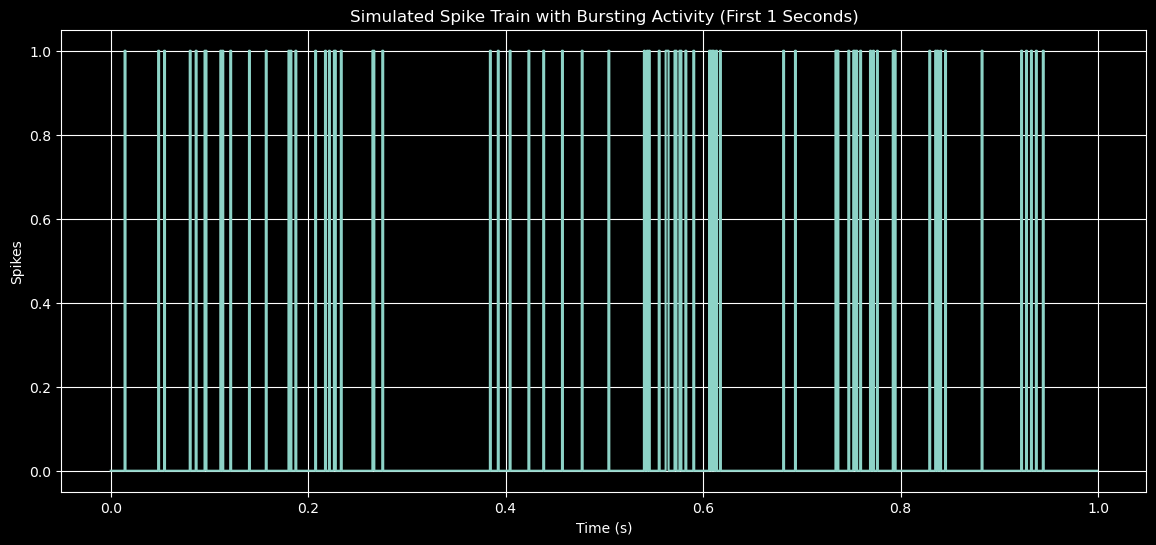

Average firing rate: 75.31 spikes/second
Number of spikes in the first second: 76.0
Minimum interspike interval: 0.001000 seconds


In [31]:
# Parameters
r0 = 55  # Baseline firing rate in spikes per second
r_burst_max = 70  # Maximum burst firing rate in spikes per second
duration = 90  # Duration of simulation in seconds
bin_size = 0.001  # Bin size in seconds (1 ms bins)
num_bins = int(duration / bin_size)  # Total number of bins

# Generate spike times
spike_times = np.cumsum(np.random.exponential(1 / r0, int(duration * r0 * 2)))
spike_times = spike_times[spike_times < duration]

# Generate spike train
spike_train_2 = np.zeros(num_bins)
bin_edges = np.arange(0, duration + bin_size, bin_size)
spike_indices = np.digitize(spike_times, bin_edges) - 1

# Ensure the indices are within the valid range
spike_indices = spike_indices[spike_indices < num_bins]

# Populate the spike train
spike_train_2[spike_indices] = 1

# Apply the bursting activity
burst_duration = int(0.005 / bin_size)  # Convert 5 ms to bins

for i in range(num_bins):
    if spike_train_2[i] == 1:
        # Apply the bursting period: increasing firing rate from 55 to 70 spikes/second for the next 5 ms
        for j in range(1, burst_duration + 1):
            if i + j < num_bins:
                adjusted_rate = r0 + 3 * j  # Linearly increase from r0 to r_burst_max
                if np.random.rand() < (adjusted_rate * bin_size):
                    spike_train_2[i + j] = 1

        # After the burst, if no spikes were set in the burst duration, reset the rate to r0
        if np.sum(spike_train_2[i + 1:i + 1 + burst_duration]) == 0:
            # If no spikes occurred during the burst period, continue with the baseline rate
            i += burst_duration

# Ensure no overflow beyond the array length
spike_train_2 = spike_train_2[:num_bins]

# Plot the spike train (first 10 seconds for visualization)
plot_duration = 1  # seconds to plot
plot_num_bins = int(plot_duration / bin_size)

plt.figure(figsize=(14, 6))
plt.plot(np.arange(plot_num_bins) * bin_size, spike_train_2[:plot_num_bins], drawstyle='steps-pre')
plt.title('Simulated Spike Train with Bursting Activity (First 1 Seconds)')
plt.xlabel('Time (s)')
plt.ylabel('Spikes')
plt.grid(True)
plt.show()

# Calculate the total number of spikes
total_spikes = np.sum(spike_train_2)

# Calculate the average firing rate
average_firing_rate = total_spikes / duration
print(f"Average firing rate: {average_firing_rate:.2f} spikes/second")

# Count the number of spikes in the first second
first_second_spikes = np.sum(spike_train_2[:int(1 / bin_size)])
print(f"Number of spikes in the first second: {first_second_spikes}")

# Calculate the minimum interspike interval (ISI)
spike_times = np.where(spike_train_2 == 1)[0]
interspike_intervals = np.diff(spike_times) * bin_size  # Convert to seconds
if len(interspike_intervals) > 0:
    min_isi = np.min(interspike_intervals)
    print(f"Minimum interspike interval: {min_isi:.6f} seconds")
else:
    print("No interspike intervals found")


Section 1 Question D

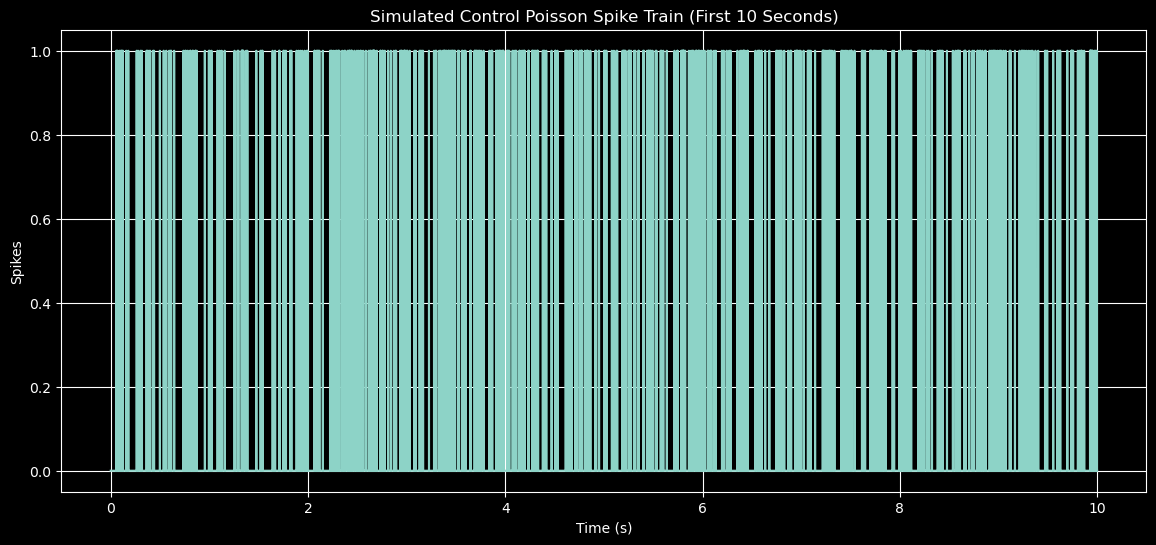

Average firing rate: 53.38 spikes/second
Number of spikes in the first second: 42.0
Minimum interspike interval: 0.001000 seconds


In [32]:
# Parameters
r0 = 55  # Baseline firing rate in spikes per second
duration = 90  # Duration of simulation in seconds
bin_size = 0.001  # Bin size in seconds (1 ms bins)
num_bins = int(duration / bin_size)  # Total number of bins

# Generate spike times
spike_times = np.cumsum(np.random.exponential(1 / r0, int(duration * r0 * 2)))
spike_times = spike_times[spike_times < duration]

# Generate spike train
spike_train_3 = np.zeros(num_bins)
bin_edges = np.arange(0, duration + bin_size, bin_size)
spike_indices = np.digitize(spike_times, bin_edges) - 1

# Ensure the indices are within the valid range
spike_indices = spike_indices[spike_indices < num_bins]

# Populate the spike train
spike_train_3[spike_indices] = 1

# Ensure no overflow beyond the array length
spike_train_3 = spike_train_3[:num_bins]

# Plot the spike train (first 10 seconds for visualization)
plot_duration = 10  # seconds to plot
plot_num_bins = int(plot_duration / bin_size)

plt.figure(figsize=(14, 6))
plt.plot(np.arange(plot_num_bins) * bin_size, spike_train_3[:plot_num_bins], drawstyle='steps-pre')
plt.title('Simulated Control Poisson Spike Train (First 10 Seconds)')
plt.xlabel('Time (s)')
plt.ylabel('Spikes')
plt.grid(True)
plt.show()

# Calculate the total number of spikes
total_spikes = np.sum(spike_train_3)

# Calculate the average firing rate
average_firing_rate = total_spikes / duration
print(f"Average firing rate: {average_firing_rate:.2f} spikes/second")

# Count the number of spikes in the first second
first_second_spikes = np.sum(spike_train_3[:int(1 / bin_size)])
print(f"Number of spikes in the first second: {first_second_spikes}")

# Calculate the minimum interspike interval (ISI)
spike_times = np.where(spike_train_3 == 1)[0]
interspike_intervals = np.diff(spike_times) * bin_size  # Convert to seconds
if len(interspike_intervals) > 0:
    min_isi = np.min(interspike_intervals)
    print(f"Minimum interspike interval: {min_isi:.6f} seconds")
else:
    print("No interspike intervals found")


In [33]:
len(spike_train_2)

90000

Section 1 Question E I

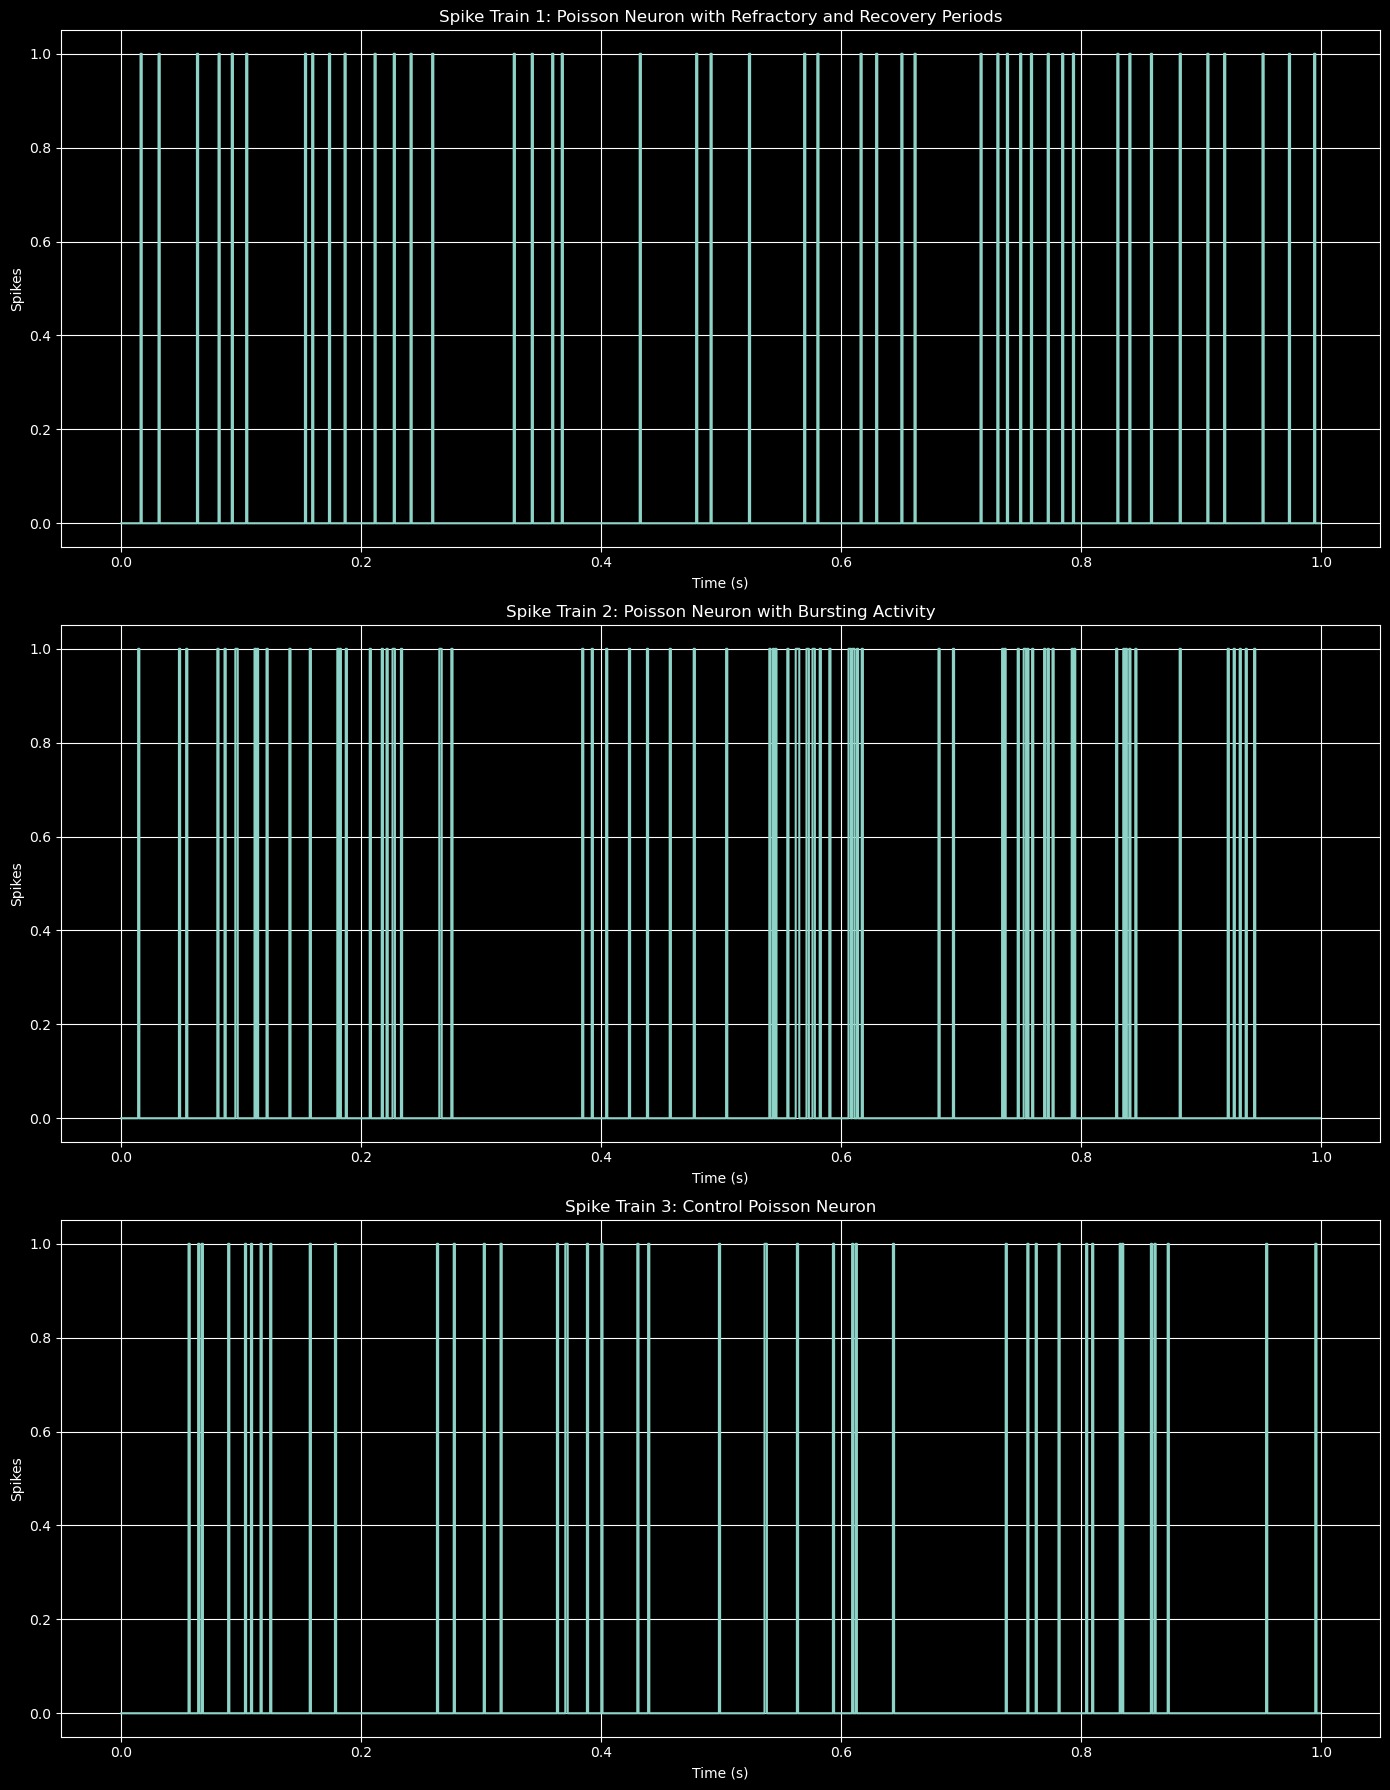

In [34]:
# Parameters
bin_size = 0.001  # Bin size in seconds (1 ms bins)
plot_duration = 1  # seconds to plot
plot_num_bins = int(plot_duration / bin_size)

# Ensure no overflow beyond the array length
spike_train_1_plot = spike_train_1[:plot_num_bins]
spike_train_2_plot = spike_train_2[:plot_num_bins]
spike_train_3_plot = spike_train_3[:plot_num_bins]

# Create the plot
fig, axs = plt.subplots(3, 1, figsize=(14, 18))

# Plot spike_train_1
axs[0].plot(np.arange(plot_num_bins) * bin_size, spike_train_1_plot, drawstyle='steps-pre')
axs[0].set_title('Spike Train 1: Poisson Neuron with Refractory and Recovery Periods')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Spikes')
axs[0].grid(True)

# Plot spike_train_2
axs[1].plot(np.arange(plot_num_bins) * bin_size, spike_train_2_plot, drawstyle='steps-pre')
axs[1].set_title('Spike Train 2: Poisson Neuron with Bursting Activity')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Spikes')
axs[1].grid(True)

# Plot spike_train_3
axs[2].plot(np.arange(plot_num_bins) * bin_size, spike_train_3_plot, drawstyle='steps-pre')
axs[2].set_title('Spike Train 3: Control Poisson Neuron')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Spikes')
axs[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


In [35]:
len(spike_train_1)

90000

Section 1 Question E II

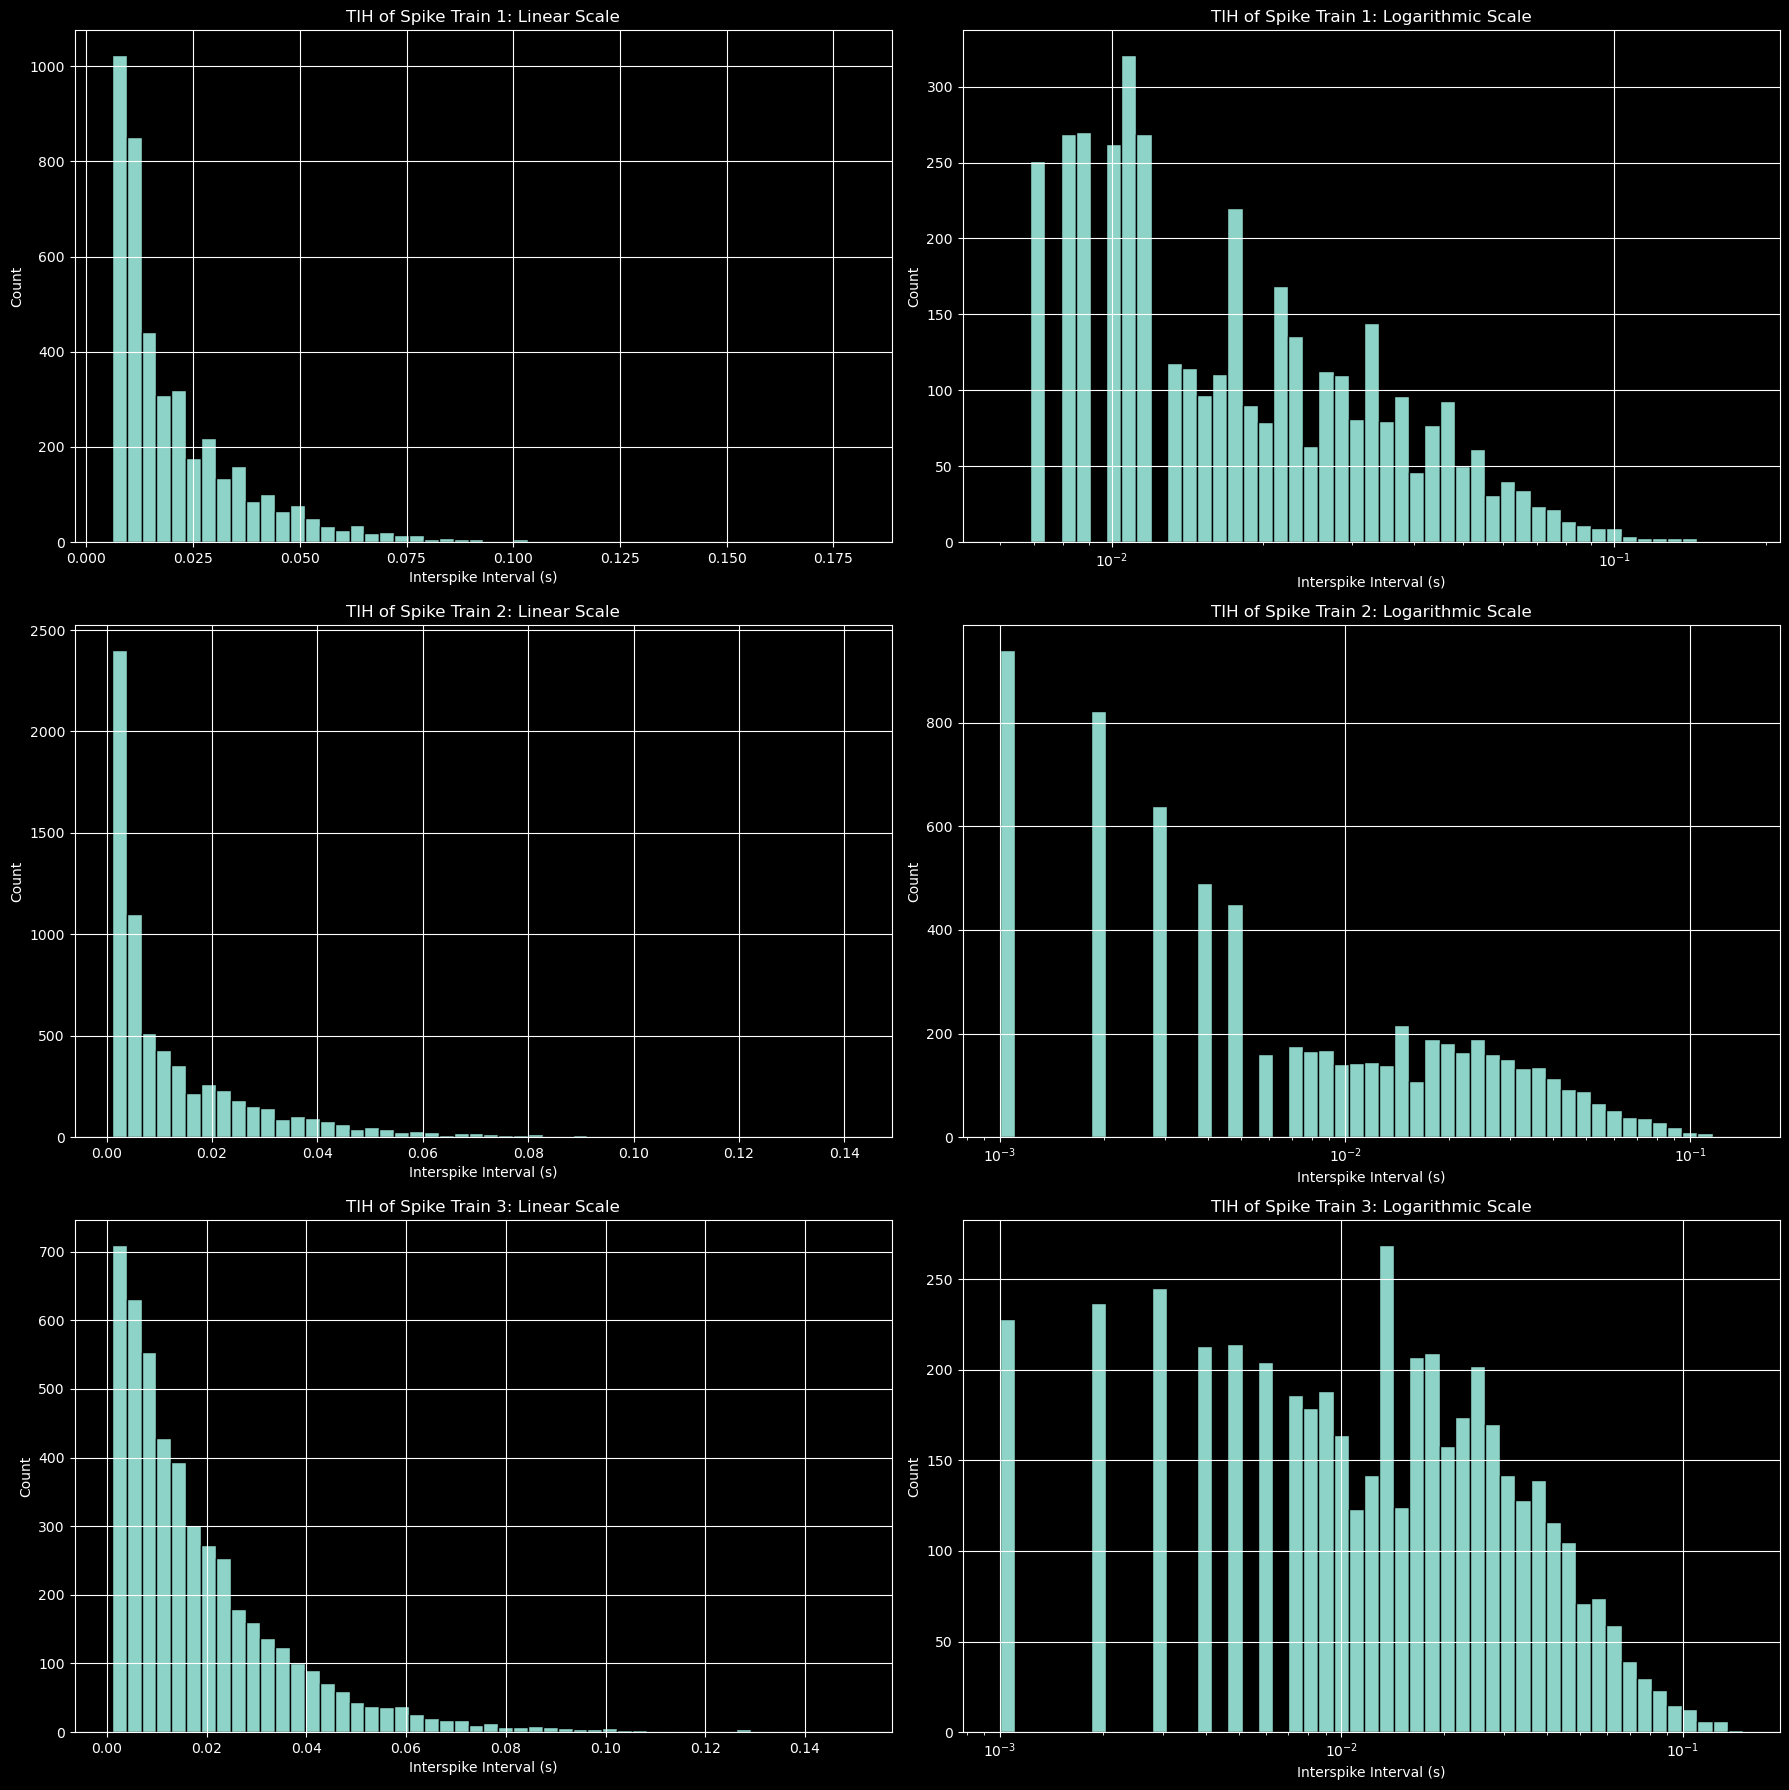

In [36]:
def calculate_isi(spike_train):
    spike_times = np.where(spike_train == 1)[0]
    interspike_intervals = np.diff(spike_times) * bin_size  # Convert to seconds
    return interspike_intervals

# Calculate ISIs for each spike train
isi_1 = calculate_isi(spike_train_1)
isi_2 = calculate_isi(spike_train_2)
isi_3 = calculate_isi(spike_train_3)

def plot_tih(ax, isi, title, xlabel='Interspike Interval (s)', ylabel='Count', bins=50, log_scale=False):
    if log_scale:
        bins = np.logspace(np.log10(min(isi)), np.log10(max(isi)), bins)
    ax.hist(isi, bins=bins, edgecolor='black')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True)
    if log_scale:
        ax.set_xscale('log')

# Create the plot
fig, axs = plt.subplots(3, 2, figsize=(18, 18))

# Plot TIH for spike_train_1
plot_tih(axs[0, 0], isi_1, 'TIH of Spike Train 1: Linear Scale')
plot_tih(axs[0, 1], isi_1, 'TIH of Spike Train 1: Logarithmic Scale', log_scale=True)

# Plot TIH for spike_train_2
plot_tih(axs[1, 0], isi_2, 'TIH of Spike Train 2: Linear Scale')
plot_tih(axs[1, 1], isi_2, 'TIH of Spike Train 2: Logarithmic Scale', log_scale=True)

# Plot TIH for spike_train_3
plot_tih(axs[2, 0], isi_3, 'TIH of Spike Train 3: Linear Scale')
plot_tih(axs[2, 1], isi_3, 'TIH of Spike Train 3: Logarithmic Scale', log_scale=True)

# Adjust layout
plt.tight_layout()
plt.show()


Section 1 Question E III

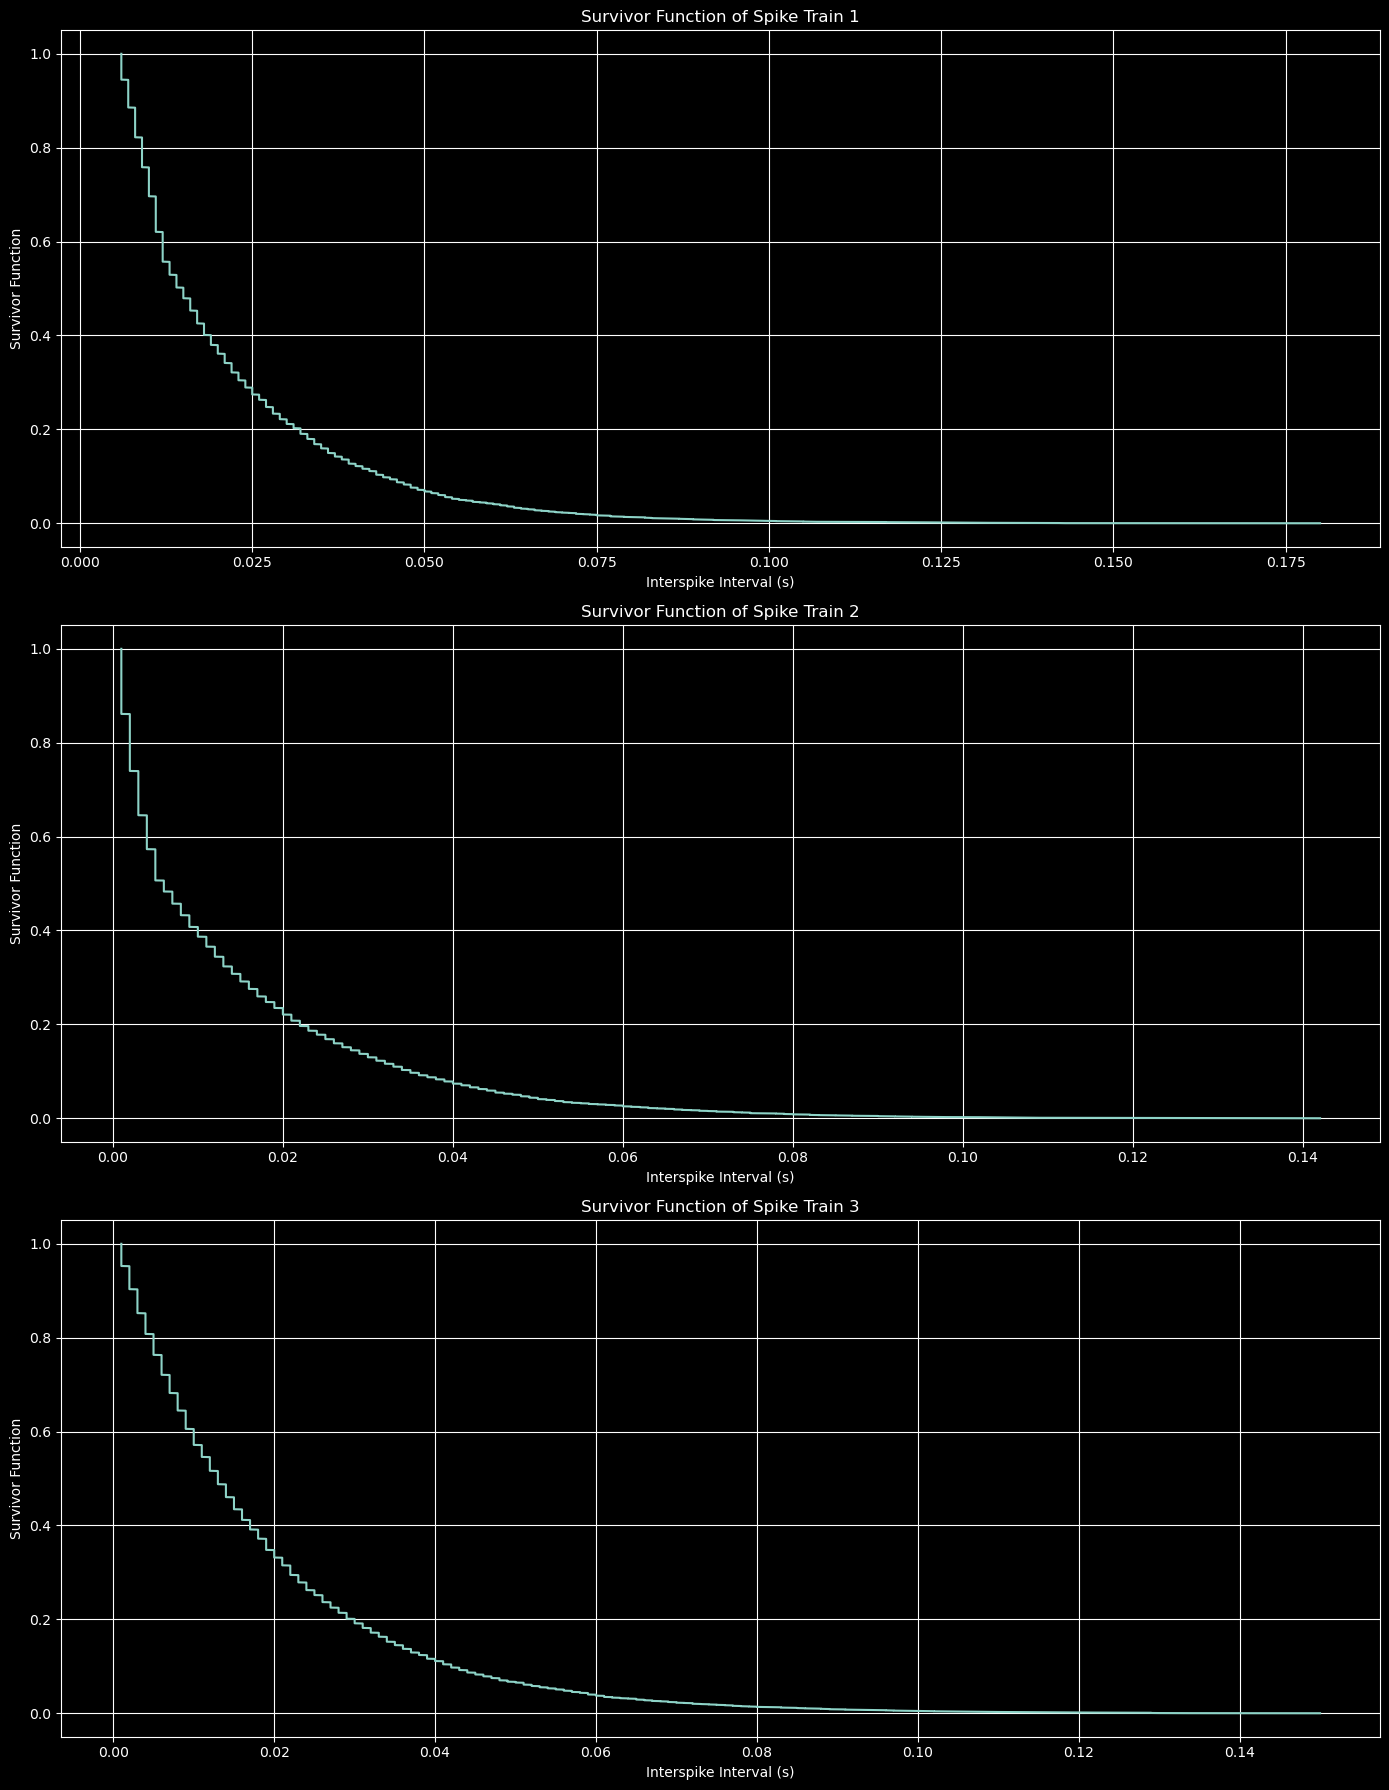

In [37]:
def calculate_survivor_function(isi):
    sorted_isi = np.sort(isi)
    survivor = 1. - np.arange(1, len(sorted_isi) + 1) / len(sorted_isi)
    return sorted_isi, survivor

# Calculate survivor functions for each spike train
sorted_isi_1, survivor_1 = calculate_survivor_function(isi_1)
sorted_isi_2, survivor_2 = calculate_survivor_function(isi_2)
sorted_isi_3, survivor_3 = calculate_survivor_function(isi_3)

def plot_survivor(ax, sorted_isi, survivor, title, xlabel='Interspike Interval (s)', ylabel='Survivor Function'):
    ax.plot(sorted_isi, survivor)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True)

# Create the plot
fig, axs = plt.subplots(3, 1, figsize=(14, 18))

# Plot survivor function for spike_train_1
plot_survivor(axs[0], sorted_isi_1, survivor_1, 'Survivor Function of Spike Train 1')

# Plot survivor function for spike_train_2
plot_survivor(axs[1], sorted_isi_2, survivor_2, 'Survivor Function of Spike Train 2')

# Plot survivor function for spike_train_3
plot_survivor(axs[2], sorted_isi_3, survivor_3, 'Survivor Function of Spike Train 3')

# Adjust layout
plt.tight_layout()
plt.show()

Section 1 Question E IV

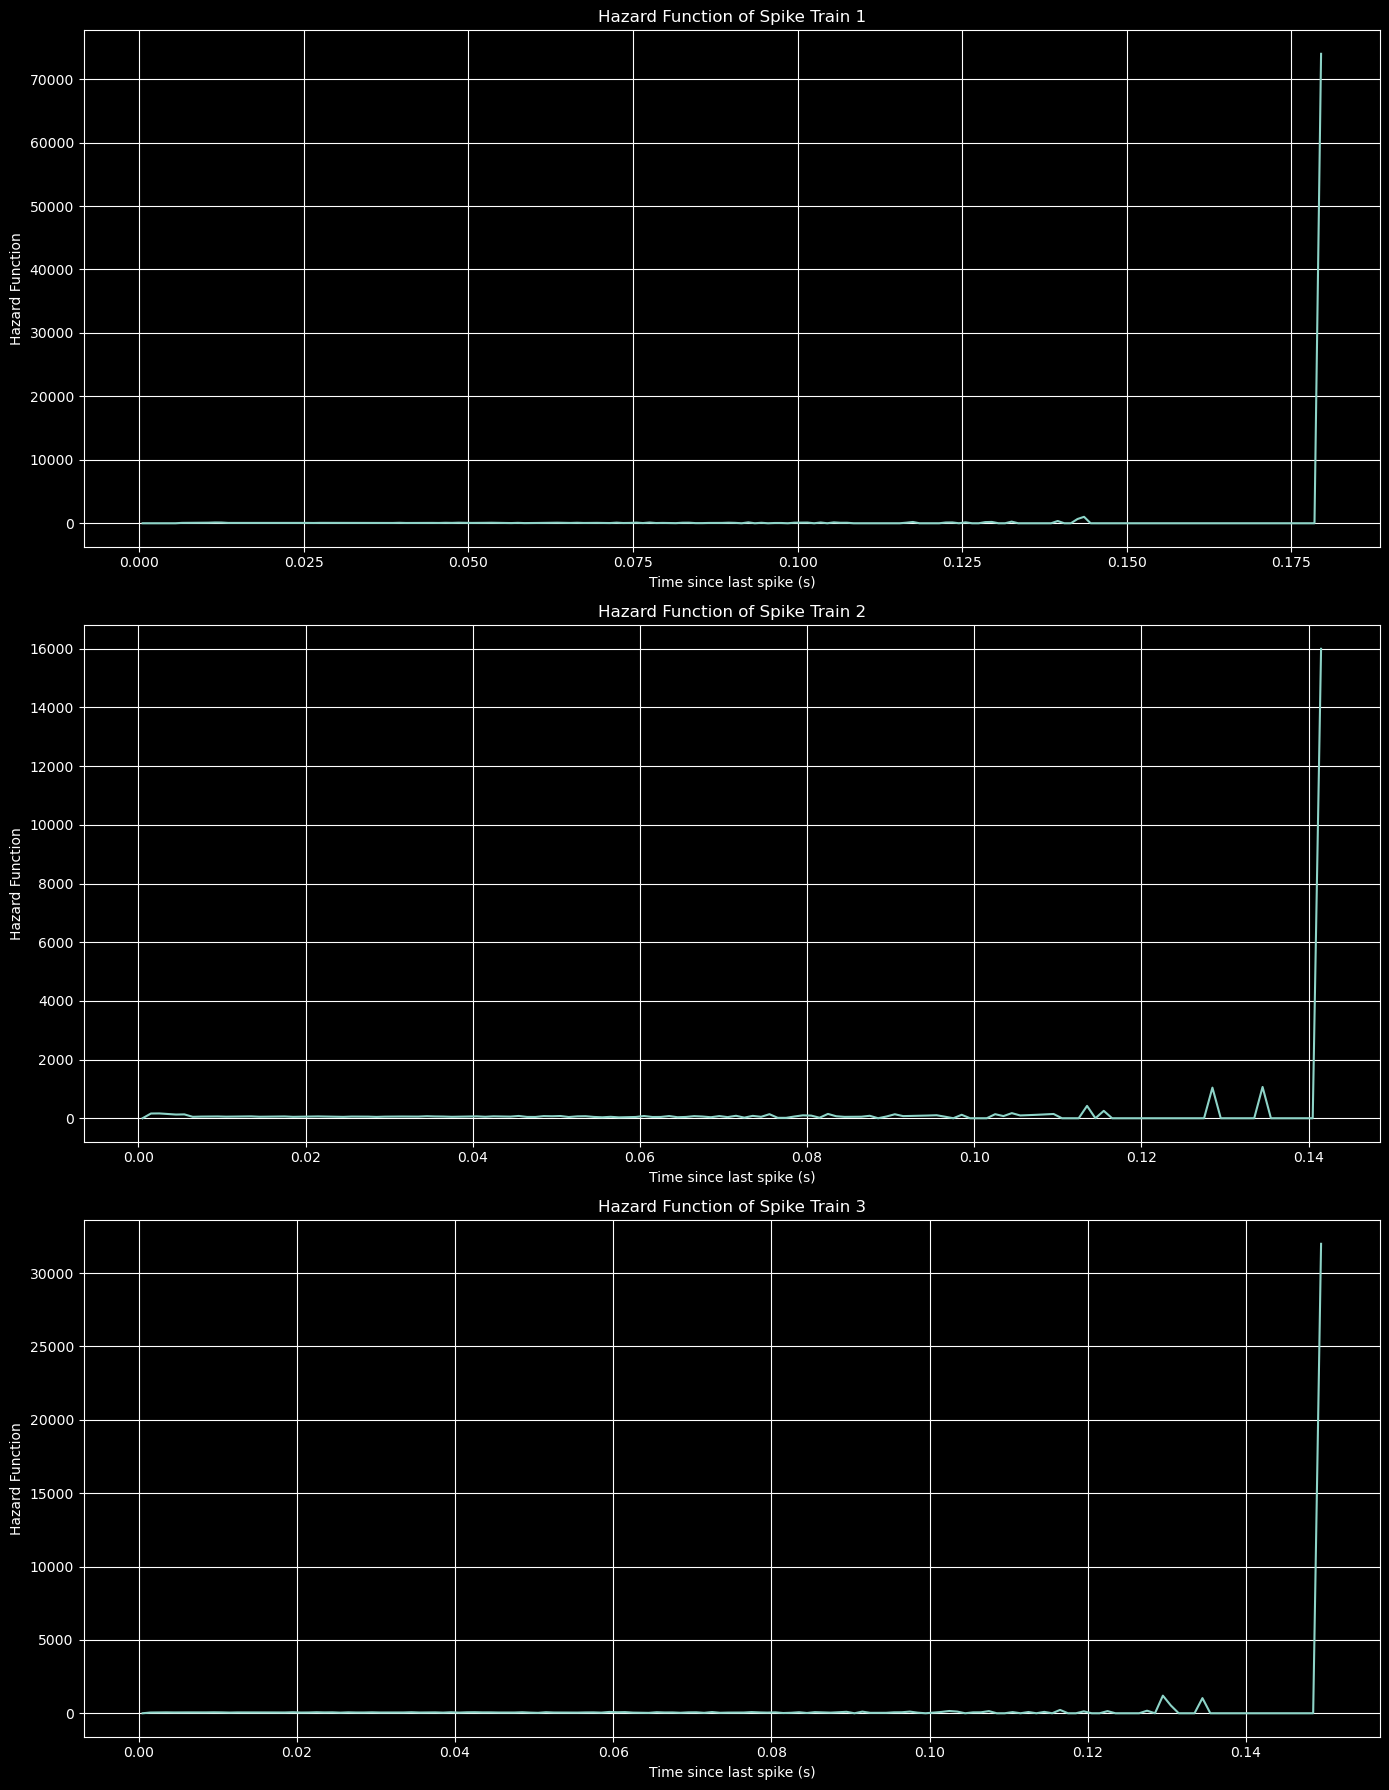

In [38]:
# Parameters
bin_size = 0.001  # Bin size in seconds (1 ms bins)
plot_duration = 10  # seconds to plot
plot_num_bins = int(plot_duration / bin_size)

def calculate_hazard_function(isi, bin_width=0.001):
    # Calculate the PDF (Probability Density Function)
    max_isi = np.max(isi)
    bins = np.arange(0, max_isi + bin_width, bin_width)
    histogram, bin_edges = np.histogram(isi, bins=bins, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Calculate the Survivor Function (Complementary CDF)
    sorted_isi, survivor = calculate_survivor_function(isi)
    
    # Interpolate the survivor function at the bin centers
    survivor_interpolated = np.interp(bin_centers, sorted_isi, survivor)
    
    # Calculate the hazard function as PDF / Survivor Function
    hazard = histogram / survivor_interpolated
    return bin_centers, hazard

# Calculate hazard functions for each spike train
bin_width = 0.001  # Width of the bins for the hazard function
bin_centers_1, hazard_1 = calculate_hazard_function(isi_1, bin_width)
bin_centers_2, hazard_2 = calculate_hazard_function(isi_2, bin_width)
bin_centers_3, hazard_3 = calculate_hazard_function(isi_3, bin_width)

def plot_hazard(ax, bin_centers, hazard, title, xlabel='Time since last spike (s)', ylabel='Hazard Function'):
    ax.plot(bin_centers, hazard)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True)

# Create the plot
fig, axs = plt.subplots(3, 1, figsize=(14, 18))

# Plot hazard function for spike_train_1
plot_hazard(axs[0], bin_centers_1, hazard_1, 'Hazard Function of Spike Train 1')

# Plot hazard function for spike_train_2
plot_hazard(axs[1], bin_centers_2, hazard_2, 'Hazard Function of Spike Train 2')

# Plot hazard function for spike_train_3
plot_hazard(axs[2], bin_centers_3, hazard_3, 'Hazard Function of Spike Train 3')

# Adjust layout
plt.tight_layout()
plt.show()


Section 1 Question E V

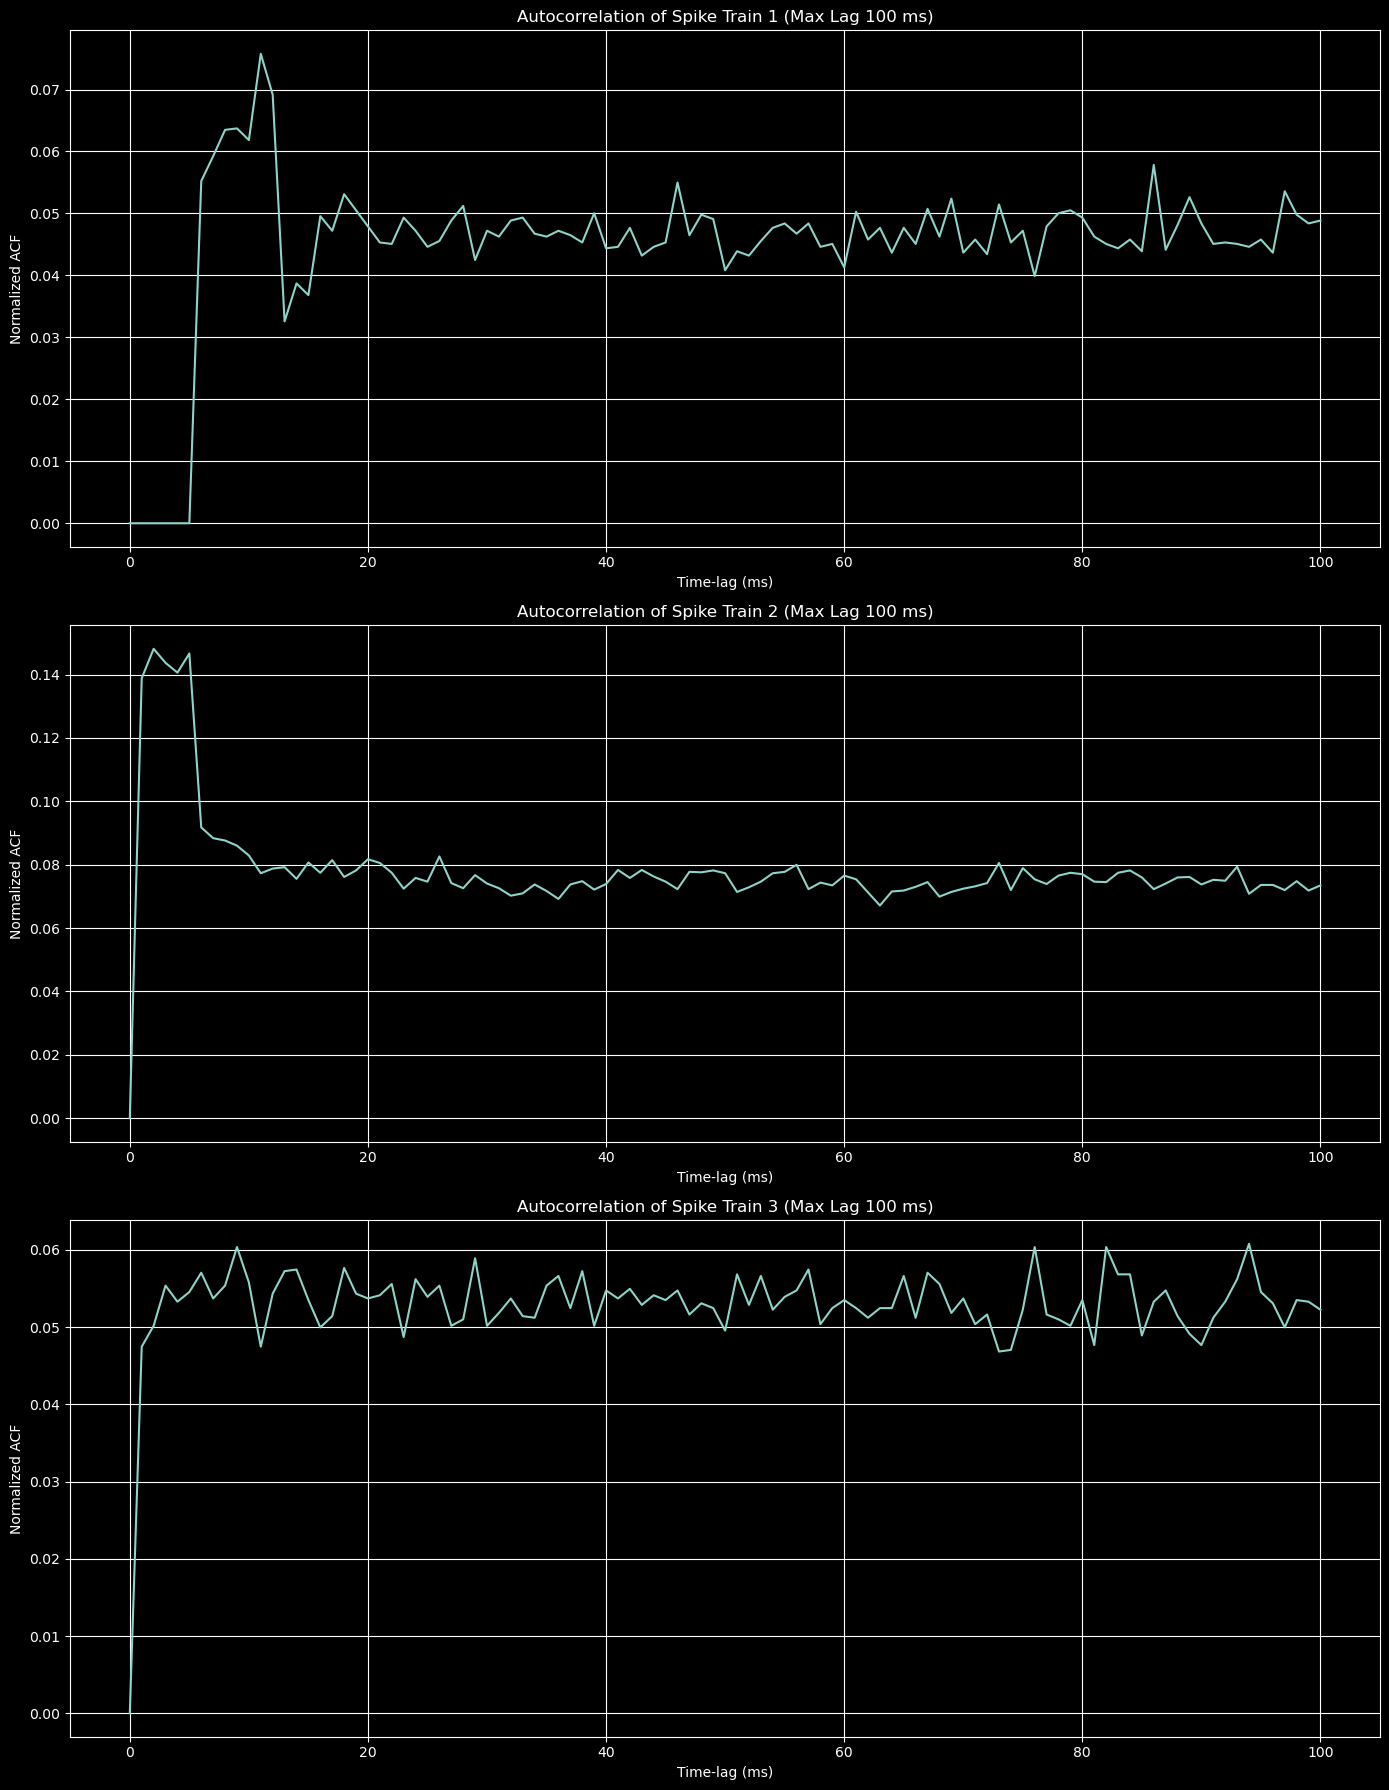

In [39]:
# Parameters
bin_size = 0.001  # Bin size in seconds (1 ms bins)
max_lag = 0.1  # Maximum time-lag in ms
max_lag_bins = int(max_lag / bin_size)  # Convert max_lag to bins

def calculate_acf(spike_train, max_lag_bins):
    autocorr = np.correlate(spike_train, spike_train, mode='full')
    autocorr = autocorr[len(autocorr) // 2:]  # Take the second half
    autocorr = autocorr[:max_lag_bins + 1]  # Limit to max_lag_bins
    autocorr[0] = 0  # Assign 0 for zero time-lag
    return autocorr

def normalize_acf(autocorr, spike_train, bin_size):
    rate = np.sum(spike_train) / (len(spike_train) * bin_size)  # Firing rate
    normalized_acf = autocorr / (rate * len(spike_train) * bin_size)
    return normalized_acf

# Calculate and normalize ACFs for each spike train
acf_1 = calculate_acf(spike_train_1, max_lag_bins)
normalized_acf_1 = normalize_acf(acf_1, spike_train_1, bin_size)

acf_2 = calculate_acf(spike_train_2, max_lag_bins)
normalized_acf_2 = normalize_acf(acf_2, spike_train_2, bin_size)

acf_3 = calculate_acf(spike_train_3, max_lag_bins)
normalized_acf_3 = normalize_acf(acf_3, spike_train_3, bin_size)

def plot_acf(ax, acf, title, xlabel='Time-lag (ms)', ylabel='Normalized ACF'):
    time_lags = np.arange(len(acf)) * bin_size * 1000  # Convert to ms
    ax.plot(time_lags, acf)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True)

# Create the plot
fig, axs = plt.subplots(3, 1, figsize=(14, 18))

# Plot ACF for spike_train_1
plot_acf(axs[0], normalized_acf_1, 'Autocorrelation of Spike Train 1 (Max Lag 100 ms)')

# Plot ACF for spike_train_2
plot_acf(axs[1], normalized_acf_2, 'Autocorrelation of Spike Train 2 (Max Lag 100 ms)')

# Plot ACF for spike_train_3
plot_acf(axs[2], normalized_acf_3, 'Autocorrelation of Spike Train 3 (Max Lag 100 ms)')

# Adjust layout
plt.tight_layout()
plt.show()


Section 1 Question E VI

In [40]:
# Parameters
bin_size = 0.001  # Bin size in seconds (1 ms bins)
window_size = 1  # Window size for Fano factor calculation in seconds

def calculate_fano_factor(spike_train, window_size, bin_size):
    # Calculate the number of bins
    num_bins = int(window_size / bin_size)
    # Segment the spike train into windows
    num_windows = len(spike_train) // num_bins
    spike_counts = np.array([np.sum(spike_train[i * num_bins:(i + 1) * num_bins]) for i in range(num_windows)])
    
    # Calculate the mean and variance of spike counts
    mean_count = np.mean(spike_counts)
    variance_count = np.var(spike_counts)
    
    # Calculate the Fano factor
    fano_factor = variance_count / mean_count if mean_count > 0 else 0
    return fano_factor

def calculate_cv(isi):
    cv = np.std(isi) / np.mean(isi)
    return cv

# For spike_train_1
isi_1 = np.diff(np.where(spike_train_1 == 1)[0]) * bin_size  # Calculate ISIs
fano_factor_1 = calculate_fano_factor(spike_train_1, window_size, bin_size)
cv_1 = calculate_cv(isi_1)

# For spike_train_2
isi_2 = np.diff(np.where(spike_train_2 == 1)[0]) * bin_size  # Calculate ISIs
fano_factor_2 = calculate_fano_factor(spike_train_2, window_size, bin_size)
cv_2 = calculate_cv(isi_2)

# For spike_train_3
isi_3 = np.diff(np.where(spike_train_3 == 1)[0]) * bin_size  # Calculate ISIs
fano_factor_3 = calculate_fano_factor(spike_train_3, window_size, bin_size)
cv_3 = calculate_cv(isi_3)

# Print results
print(f"Fano Factor for Spike Train 1: {fano_factor_1:.2f}")
print(f"CV for Spike Train 1: {cv_1:.2f}")
print(f"Fano Factor for Spike Train 2: {fano_factor_2:.2f}")
print(f"CV for Spike Train 2: {cv_2:.2f}")
print(f"Fano Factor for Spike Train 3: {fano_factor_3:.2f}")
print(f"CV for Spike Train 3: {cv_3:.2f}")


Fano Factor for Spike Train 1: 0.69
CV for Spike Train 1: 0.82
Fano Factor for Spike Train 2: 1.88
CV for Spike Train 2: 1.25
Fano Factor for Spike Train 3: 0.82
CV for Spike Train 3: 0.98


Section 1 Question E VII

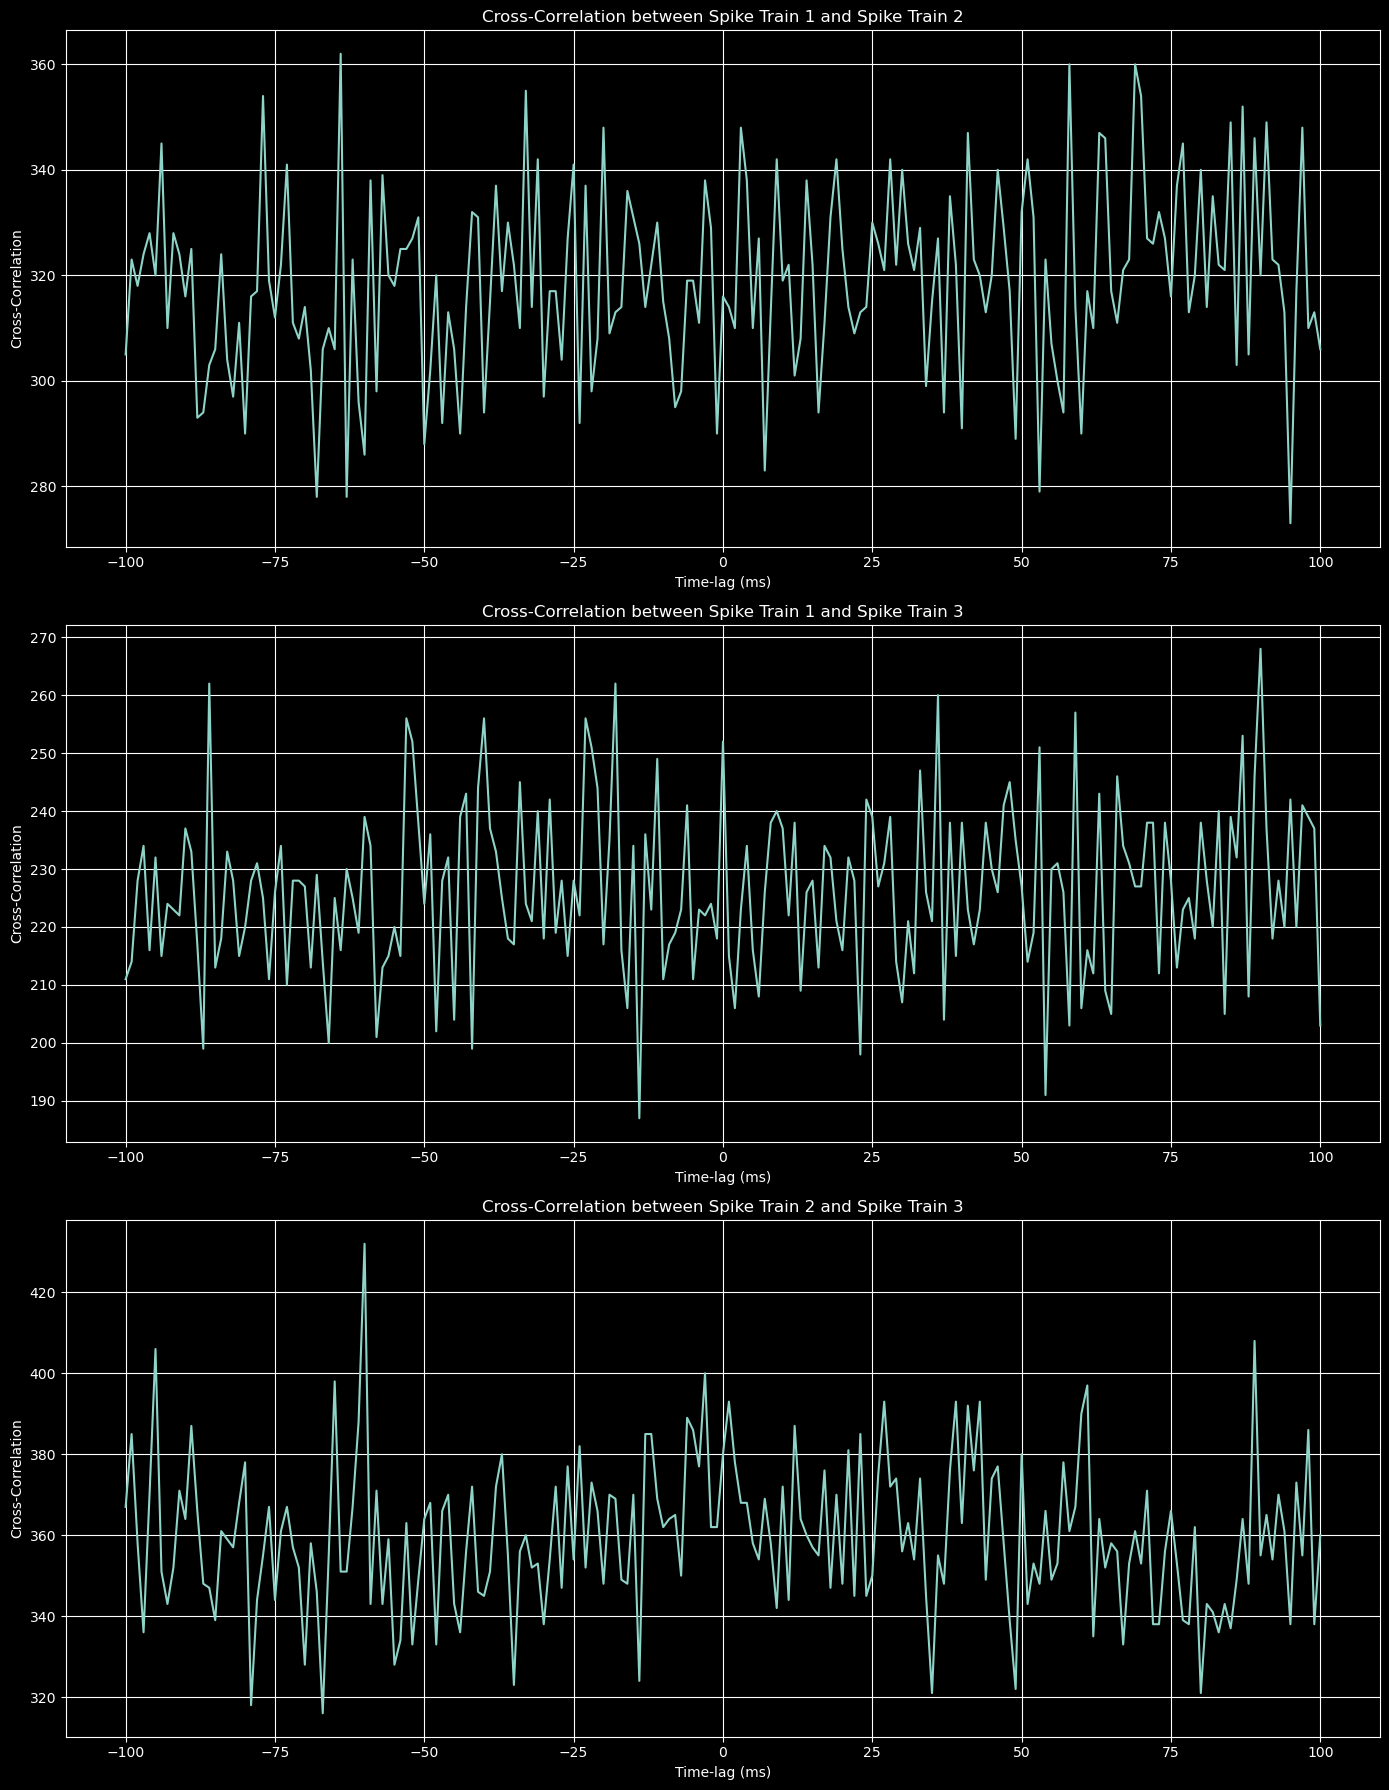

In [41]:
# Parameters
bin_size = 0.001  # Bin size in seconds (1 ms bins)
max_lag = 0.1  # Maximum time-lag in seconds
max_lag_bins = int(max_lag / bin_size)  # Convert max_lag to bins

def calculate_cross_correlation(spike_train_1, spike_train_2, max_lag_bins):
    cross_corr = np.correlate(spike_train_1, spike_train_2, mode='full')
    mid_point = len(cross_corr) // 2
    cross_corr = cross_corr[mid_point - max_lag_bins:mid_point + max_lag_bins + 1]
    return cross_corr

def plot_cross_correlation(ax, cross_corr, max_lag_bins, title, xlabel='Time-lag (ms)', ylabel='Cross-Correlation'):
    time_lags = np.arange(-max_lag_bins, max_lag_bins + 1) * bin_size * 1000  # Convert to ms
    ax.plot(time_lags, cross_corr)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True)

# Calculate cross-correlations for each pair of spike trains
cross_corr_12 = calculate_cross_correlation(spike_train_1, spike_train_2, max_lag_bins)
cross_corr_13 = calculate_cross_correlation(spike_train_1, spike_train_3, max_lag_bins)
cross_corr_23 = calculate_cross_correlation(spike_train_2, spike_train_3, max_lag_bins)

# Create the plot
fig, axs = plt.subplots(3, 1, figsize=(14, 18))

# Plot cross-correlation for spike_train_1 and spike_train_2
plot_cross_correlation(axs[0], cross_corr_12, max_lag_bins, 'Cross-Correlation between Spike Train 1 and Spike Train 2')

# Plot cross-correlation for spike_train_1 and spike_train_3
plot_cross_correlation(axs[1], cross_corr_13, max_lag_bins, 'Cross-Correlation between Spike Train 1 and Spike Train 3')

# Plot cross-correlation for spike_train_2 and spike_train_3
plot_cross_correlation(axs[2], cross_corr_23, max_lag_bins, 'Cross-Correlation between Spike Train 2 and Spike Train 3')

# Adjust layout
plt.tight_layout()
plt.show()


Section 2
Question A

In [42]:
import scipy.io as sio


# Load the .mat files
sta_data = sio.loadmat('STA.mat')
kernel_data = sio.loadmat('kernel.mat')

# Extracting the relevant data from the files
stim_signal = sta_data['stimSig']  # Stimulation signal
spike_train = sta_data['spikeTrain']  # Spike train

stim_white_noise = kernel_data['stim']  # White noise stimulus
spike_activity = kernel_data['resp']  # Spiking activity matrix


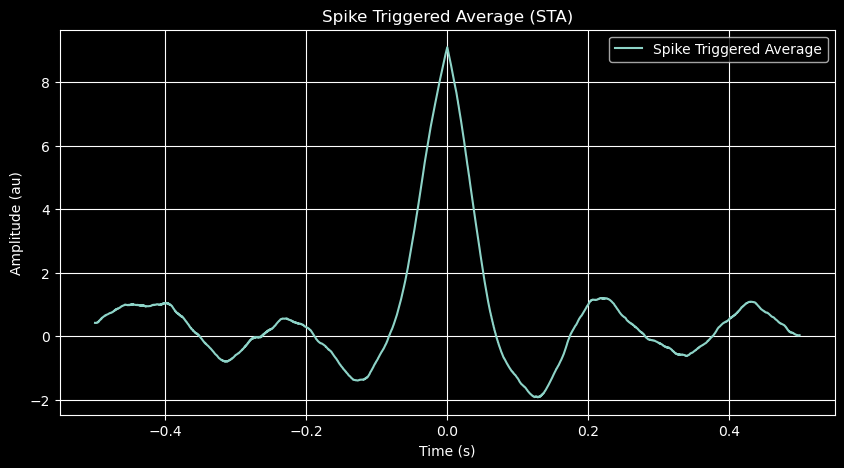

In [43]:
# Constants
sampling_rate = 2000  # Hz
window_size = int(0.5 * sampling_rate)  # 500 ms window

# Calculate the Spike Triggered Average (STA)
spike_times = np.where(spike_train[0] == 1)[0]  # Identify spike times
sta = np.zeros((2 * window_size + 1,))  # Initialize STA array

for spike in spike_times:
    if spike - window_size >= 0 and spike + window_size < len(stim_signal[0]):
        sta += stim_signal[0][spike - window_size : spike + window_size + 1]

sta /= len(spike_times)  # Average the STA

# Time axis for plotting
time_axis = np.linspace(-0.5, 0.5, 2 * window_size + 1)

# Plot the STA
plt.style.use('dark_background')

plt.figure(figsize=(10, 5))
plt.plot(time_axis, sta, label='Spike Triggered Average')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (au)')
plt.title('Spike Triggered Average (STA)')
plt.legend()
plt.grid(True)
plt.show()


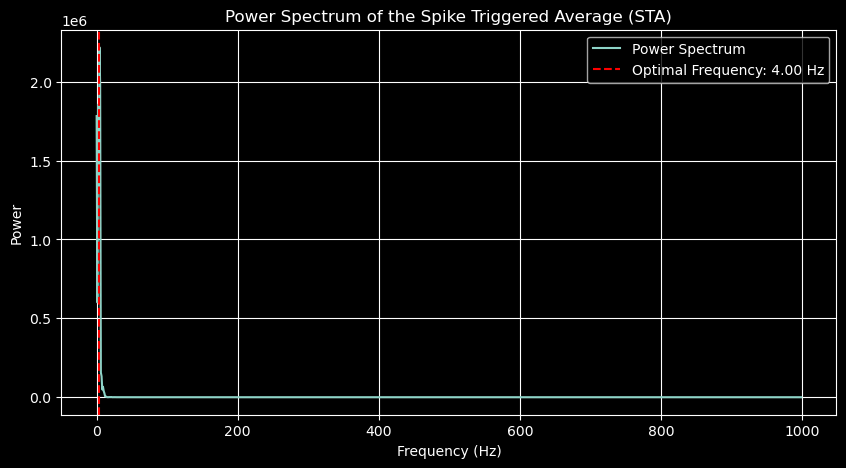

Optimal Sine Frequency: 4.00 Hz


In [44]:
# Compute the Fourier Transform of the STA
sta_fft = np.fft.fft(sta)
frequencies = np.fft.fftfreq(len(sta), d=1/sampling_rate)

# Compute the power spectrum
power_spectrum = np.abs(sta_fft)**2

# Find the frequency with the highest power
max_power_index = np.argmax(power_spectrum)
optimal_frequency = np.abs(frequencies[max_power_index])

# Plot the power spectrum
plt.figure(figsize=(10, 5))
plt.plot(frequencies[:len(frequencies)//2], power_spectrum[:len(power_spectrum)//2], label='Power Spectrum')
plt.axvline(optimal_frequency, color='r', linestyle='--', label=f'Optimal Frequency: {optimal_frequency:.2f} Hz')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Power Spectrum of the Spike Triggered Average (STA)')
plt.legend()
plt.grid(True)
plt.show()

print(f'Optimal Sine Frequency: {optimal_frequency:.2f} Hz')


Section 2
Question B

In [45]:
stim_white_noise = kernel_data['stim'][0]  # Assuming 'stim' is a 1x60000 vector

In [46]:
def calculate_firing_rate(spike_activity, window_size, sampling_rate=1000):
    num_trials, num_samples = spike_activity.shape
    window_size_samples = int(window_size * sampling_rate / 1000)  # Convert ms to samples
    firing_rate = np.zeros(num_samples)

    for trial in range(num_trials):
        for i in range(num_samples):
            start = max(0, i - window_size_samples // 2)
            end = min(num_samples, i + window_size_samples // 2)
            firing_rate[i] += np.sum(spike_activity[trial, start:end])
    
    firing_rate /= (num_trials * window_size_samples / sampling_rate)
    return firing_rate


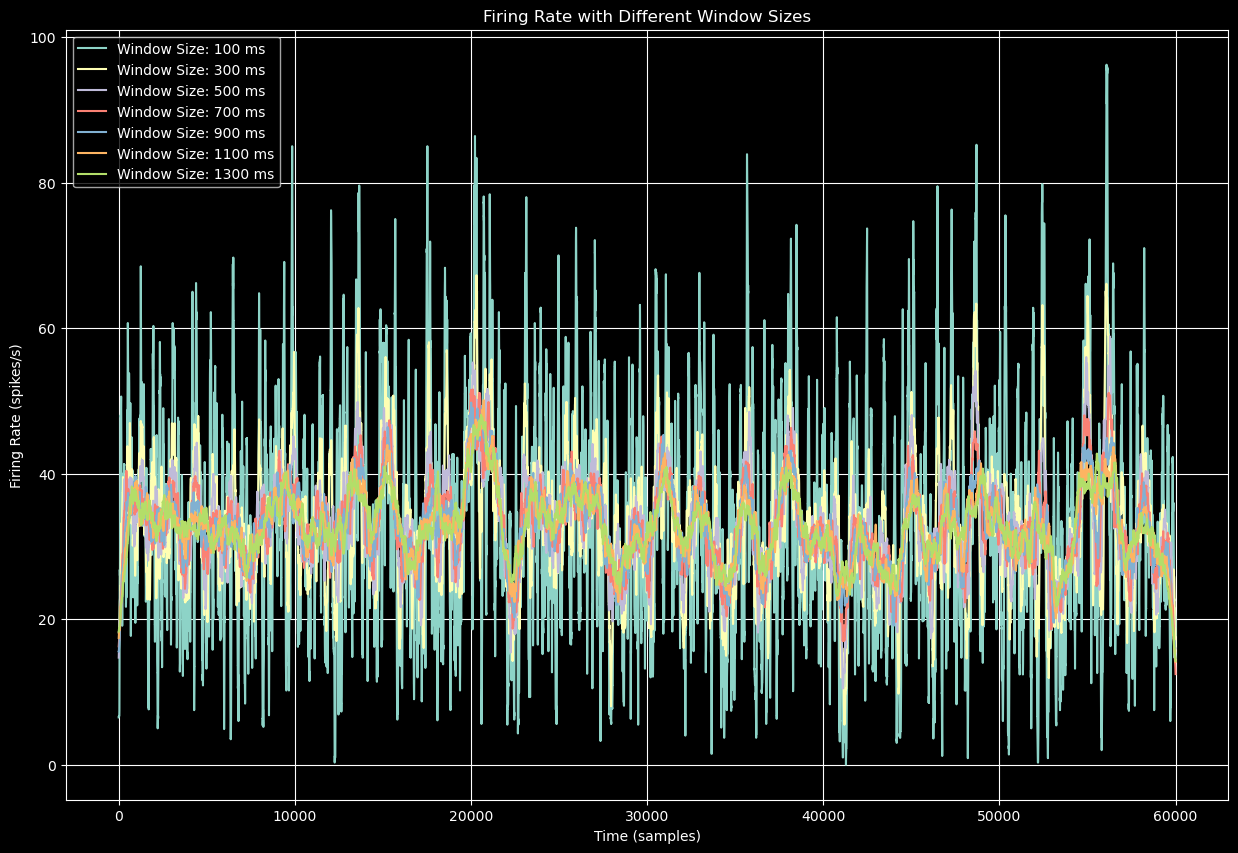

In [47]:
# Define the range of window sizes
window_sizes = [100, 300, 500, 700, 900, 1100, 1300]  # in ms

plt.figure(figsize=(15, 10))

for window_size in window_sizes:
    firing_rate = calculate_firing_rate(spike_activity, window_size)
    plt.plot(firing_rate, label=f'Window Size: {window_size} ms')

plt.xlabel('Time (samples)')
plt.ylabel('Firing Rate (spikes/s)')
plt.title('Firing Rate with Different Window Sizes')
plt.legend()
plt.grid(True)
plt.show()


Section 2 
Question B. b. 

In [48]:
stim_white_noise = kernel_data['stim'][0]  # 'stim' is a 1x60000 vector
spike_activity = kernel_data['resp']  # 'resp' is a 100x60000 matrix

In [49]:
def calculate_sta(stim, spikes, window_size, sampling_rate=1000):
    window_size_samples = int(window_size * sampling_rate / 1000)  # Convert ms to samples
    sta = np.zeros(2 * window_size_samples + 1)
    
    num_trials, num_samples = spikes.shape
    for trial in range(num_trials):
        spike_times = np.where(spikes[trial] == 1)[0]
        for spike in spike_times:
            if spike - window_size_samples >= 0 and spike + window_size_samples < num_samples:
                sta += stim[spike - window_size_samples : spike + window_size_samples + 1]
    
    sta /= (num_trials * len(spike_times))
    return sta, window_size_samples

# Define the window size for the kernel calculation
window_size = 500  # in ms

# Calculate the optimal kernel
optimal_kernel, window_size_samples = calculate_sta(stim_white_noise, spike_activity, window_size)


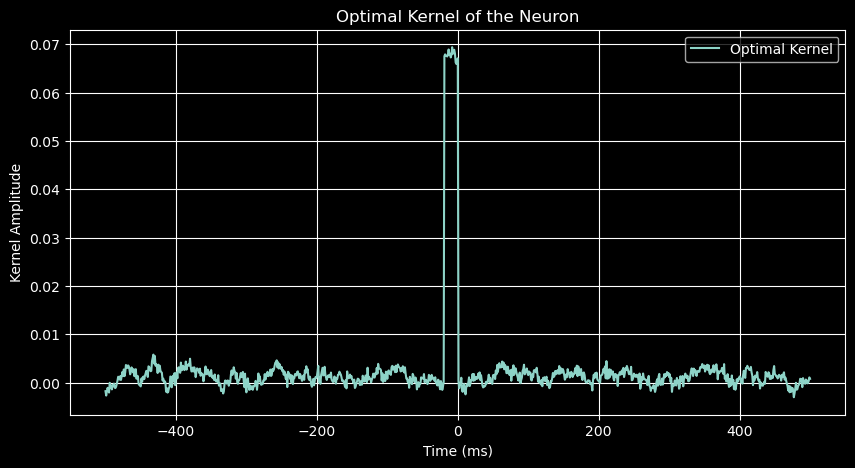

In [50]:
import matplotlib as mpl

# Time axis for plotting
time_axis = np.linspace(-window_size, window_size, 2 * window_size_samples + 1)

# Plot the optimal kernel


plt.figure(figsize=(10, 5))
plt.plot(time_axis, optimal_kernel, label='Optimal Kernel')
plt.xlabel('Time (ms)')
plt.ylabel('Kernel Amplitude')
plt.title('Optimal Kernel of the Neuron')
plt.legend()
plt.grid(True)
plt.show()


Section 2 Question C

In [51]:
def simulate_neuron_model(stim, kernel, r0):
    # Convolve the stimulus with the kernel
    r_model = r0 + np.convolve(stim, kernel, mode='same')
    # Apply rectifier non-linearity (ReLU)
    r_model = np.maximum(0, r_model)
    return r_model


In [52]:
def calculate_rmse(actual, predicted):
    return np.sqrt(np.mean((actual - predicted) ** 2))

# Define a range of window sizes to test
window_sizes = range(100, 1300, 100)  # from 100 ms to 1200 ms in steps of 100 ms
rmse_values = []

for window_size in window_sizes:
    window_size_samples = int(window_size * 1000 / 1000)  # Convert ms to samples
    kernel = calculate_sta(stim_white_noise, spike_activity, window_size)[0]
    r_model = simulate_neuron_model(stim_signal[0], kernel, r0=0)
    rmse = calculate_rmse(spike_train[0], r_model)
    rmse_values.append(rmse)

# Find the window size with the minimum RMSE
optimal_window_size = window_sizes[np.argmin(rmse_values)]


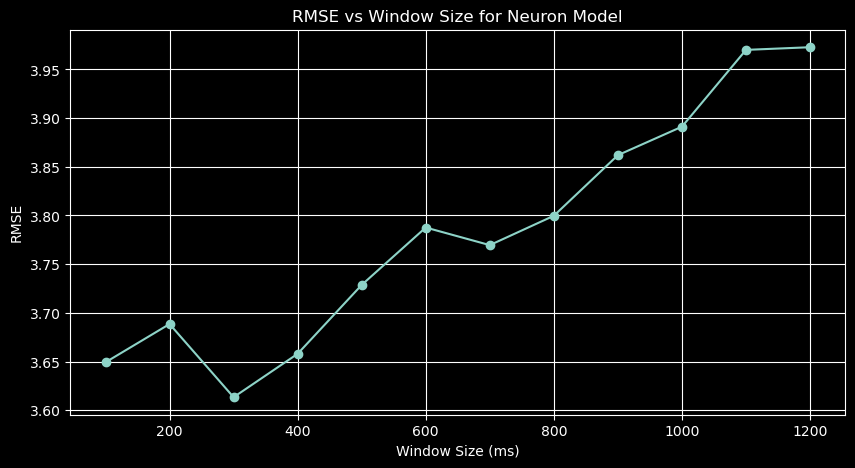

In [53]:
# Plot RMSE vs Window Size

plt.figure(figsize=(10, 5))
plt.plot(window_sizes, rmse_values, marker='o')
plt.xlabel('Window Size (ms)')
plt.ylabel('RMSE')
plt.title('RMSE vs Window Size for Neuron Model')
plt.grid(True)
plt.show()

# Simulate and plot the optimized model response
optimal_kernel = calculate_sta(stim_white_noise, spike_activity, optimal_window_size)[0]
r_model_optimized = simulate_neuron_model(stim_signal[0], optimal_kernel, r0=0)




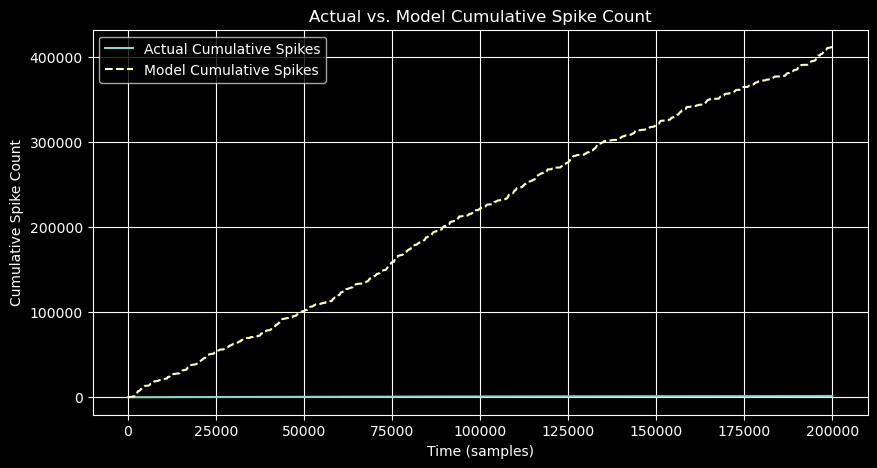

In [54]:
# Calculate cumulative spike counts
actual_cumulative_spikes = np.cumsum(spike_train[0])
model_cumulative_spikes = np.cumsum(r_model_optimized)

# Plot the actual vs. model cumulative spike counts
plt.figure(figsize=(10, 5))
plt.plot(actual_cumulative_spikes, label='Actual Cumulative Spikes')
plt.plot(model_cumulative_spikes, label='Model Cumulative Spikes', linestyle='--')
plt.xlabel('Time (samples)')
plt.ylabel('Cumulative Spike Count')
plt.title('Actual vs. Model Cumulative Spike Count')
plt.legend()
plt.grid(True)
plt.show()


Section 3 Question A

In [55]:
import matplotlib
matplotlib.style.use('default') 

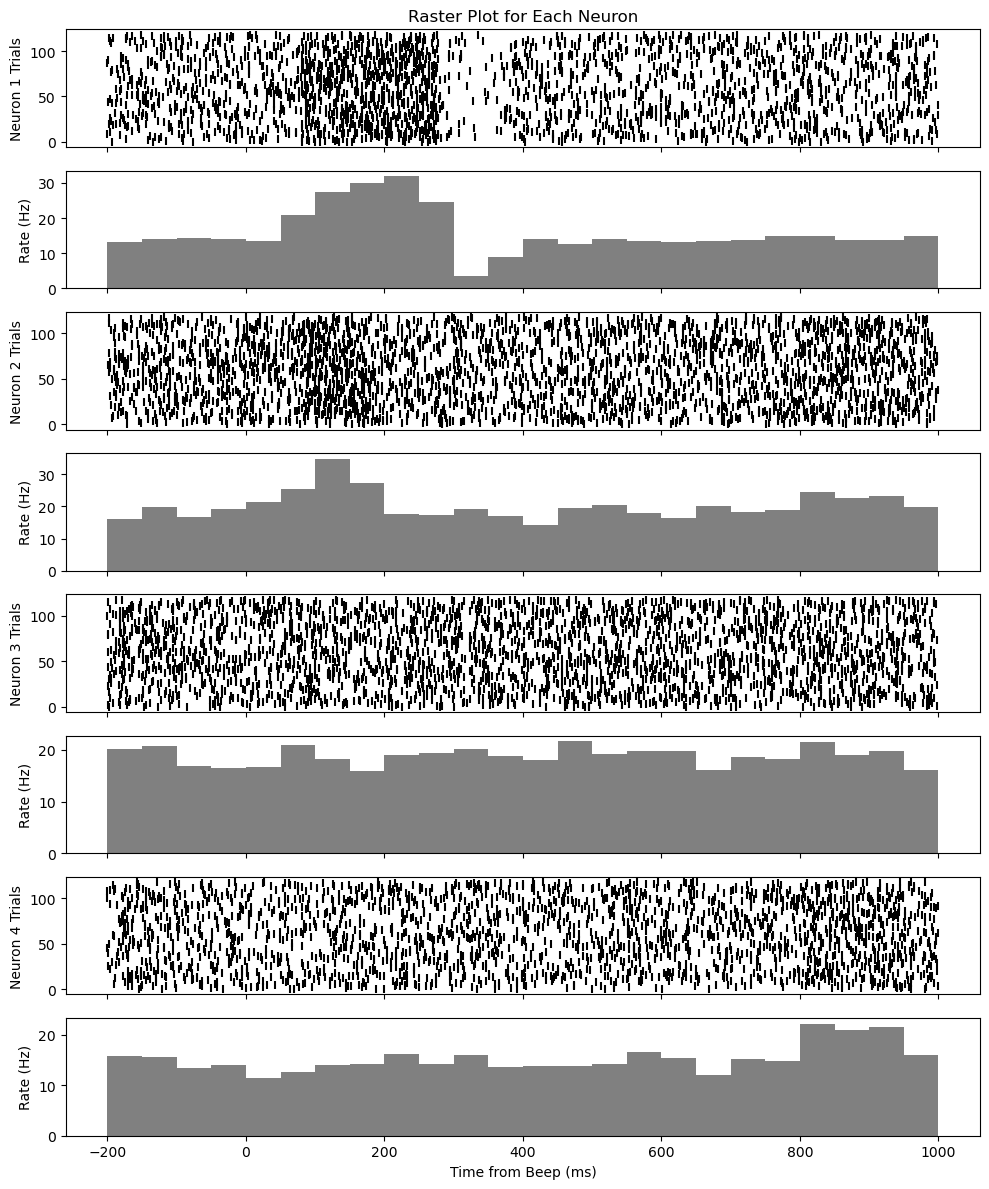

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Constants
PRE_TIME = 200  # ms before beep
POST_TIME = 1000  # ms after beep
BIN_SIZE = 50  # Bin size for PSTH, in ms

# Load data
beep_times = pd.read_csv('beep_times.csv').values * 1000  # Convert seconds to ms
spike_trains = pd.read_csv('spike_trains.csv', header=None).values

# Convert beep times from seconds to milliseconds and adjust for indexing
beep_indices = (beep_times).astype(int)

# Number of neurons
num_neurons = spike_trains.shape[0]

# Precompute spike segments for each beep
segments = []
for beep_time in beep_indices:
    start = int(beep_time - PRE_TIME)
    end = int(beep_time + POST_TIME)
    if start < 0 or end > spike_trains.shape[1]:
        continue
    segments.append(spike_trains[:, start:end])

segments = np.array(segments)

# Prepare to plot
fig, axes = plt.subplots(2 * num_neurons, 1, figsize=(10, 3 * num_neurons), sharex=True)

# Loop through each neuron to plot raster and PSTH
for neuron_idx in range(num_neurons):
    all_spikes = []  # Collect spikes for PSTH
    ax_raster = axes[2 * neuron_idx]

    # Raster plot for neuron
    for trial_idx, segment in enumerate(segments):
        spike_times = np.where(segment[neuron_idx, :] == 1)[0] - PRE_TIME
        ax_raster.scatter(spike_times, np.full_like(spike_times, fill_value=trial_idx), marker='|', color='black')
        all_spikes.extend(spike_times)

    ax_raster.set_ylabel(f'Neuron {neuron_idx + 1} Trials')
    if neuron_idx == 0:
        ax_raster.set_title('Raster Plot for Each Neuron')

    # PSTH plot for neuron
    ax_psth = axes[2 * neuron_idx + 1]
    bins = np.arange(-PRE_TIME, POST_TIME + BIN_SIZE, BIN_SIZE)
    hist, bin_edges = np.histogram(all_spikes, bins=bins)
    hist = hist / len(beep_indices) / (BIN_SIZE / 1000)  # Normalize to get firing rate in Hz
    ax_psth.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), align='edge', color='gray')
    ax_psth.set_ylabel('Rate (Hz)')

    if neuron_idx == num_neurons - 1:
        ax_psth.set_xlabel('Time from Beep (ms)')

plt.tight_layout()
plt.show()


Section 3 Question C

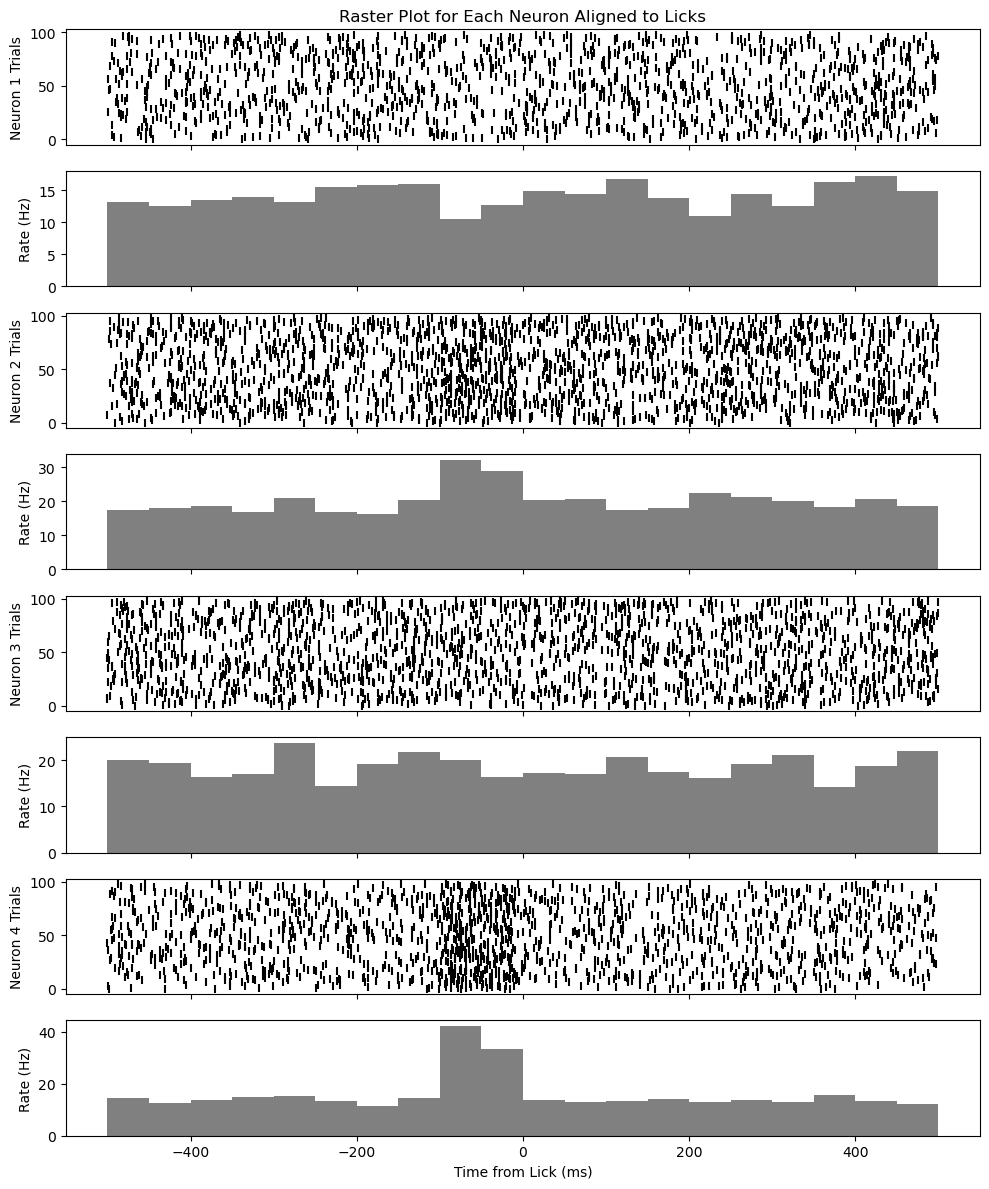

In [57]:
# Constants for lick-aligned plots
PRE_TIME_LICK = 500  # ms before lick
POST_TIME_LICK = 500  # ms after lick
BIN_SIZE_LICK = 50  # Bin size for PSTH, in ms

# Load lick times data
lick_times = pd.read_csv('lick_times.csv').values * 1000  # Convert seconds to ms

# Convert lick times from seconds to milliseconds and adjust for indexing
lick_indices = (lick_times).astype(int)

# Precompute spike segments for each lick
lick_segments = []
for lick_time in lick_indices:
    start = int(lick_time - PRE_TIME_LICK)
    end = int(lick_time + POST_TIME_LICK)
    if start < 0 or end > spike_trains.shape[1]:
        continue
    lick_segments.append(spike_trains[:, start:end])

lick_segments = np.array(lick_segments)

# Prepare to plot
fig, axes = plt.subplots(2 * num_neurons, 1, figsize=(10, 3 * num_neurons), sharex=True)

# Loop through each neuron to plot raster and PSTH
for neuron_idx in range(num_neurons):
    all_spikes = []  # Collect spikes for PSTH
    ax_raster = axes[2 * neuron_idx]

    # Raster plot for neuron
    for trial_idx, segment in enumerate(lick_segments):
        spike_times = np.where(segment[neuron_idx, :] == 1)[0] - PRE_TIME_LICK
        ax_raster.scatter(spike_times, np.full_like(spike_times, fill_value=trial_idx), marker='|', color='black')
        all_spikes.extend(spike_times)

    ax_raster.set_ylabel(f'Neuron {neuron_idx + 1} Trials')
    if neuron_idx == 0:
        ax_raster.set_title('Raster Plot for Each Neuron Aligned to Licks')

    # PSTH plot for neuron
    ax_psth = axes[2 * neuron_idx + 1]
    bins = np.arange(-PRE_TIME_LICK, POST_TIME_LICK + BIN_SIZE_LICK, BIN_SIZE_LICK)
    hist, bin_edges = np.histogram(all_spikes, bins=bins)
    hist = hist / len(lick_indices) / (BIN_SIZE_LICK / 1000)  # Normalize to get firing rate in Hz
    ax_psth.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), align='edge', color='gray')
    ax_psth.set_ylabel('Rate (Hz)')

    if neuron_idx == num_neurons - 1:
        ax_psth.set_xlabel('Time from Lick (ms)')

plt.tight_layout()
plt.show()


Section 3 Question D

In [58]:
import pandas as pd

# Load data
data = pd.read_csv('fr_pre_licks.csv')

# Define the threshold
threshold = 20

# Make predictions
data['predicted_lick'] = (data['fr_100ms_pre'] > threshold).astype(int)

# Initialize metrics
metrics = {}

# Calculate metrics for each neuron
for neuron in data['neuron'].unique():
    subdata = data[data['neuron'] == neuron]
    TP = ((subdata['lick'] == 1) & (subdata['predicted_lick'] == 1)).sum()
    FP = ((subdata['lick'] == 0) & (subdata['predicted_lick'] == 1)).sum()
    TN = ((subdata['lick'] == 0) & (subdata['predicted_lick'] == 0)).sum()
    FN = ((subdata['lick'] == 1) & (subdata['predicted_lick'] == 0)).sum()
    
    accuracy = (TP + TN) / (TP + FP + TN + FN)
    TPR = TP / (TP + FN) if (TP + FN) != 0 else 0  # True Positive Rate
    FPR = FP / (FP + TN) if (FP + TN) != 0 else 0  # False Positive Rate
    
    metrics[neuron] = {'Accuracy': accuracy, 'TPR': TPR, 'FPR': FPR}

# Print the metrics
for neuron, m in metrics.items():
    print(f"Neuron {neuron}: Accuracy = {m['Accuracy']:.2f}, TPR = {m['TPR']:.2f}, FPR = {m['FPR']:.2f}")


Neuron A: Accuracy = 0.50, TPR = 0.02, FPR = 0.02
Neuron B: Accuracy = 0.62, TPR = 0.98, FPR = 0.74
Neuron C: Accuracy = 0.47, TPR = 0.08, FPR = 0.14
Neuron D: Accuracy = 0.95, TPR = 0.90, FPR = 0.00


In [59]:
import numpy as np

# Define the range of firing rate thresholds
thresholds = np.arange(1, 51, 1)  # From 1 Hz to 50 Hz

# Initialize dictionaries to store TPR and FPR values for each neuron
tpr_dict = {neuron: [] for neuron in data['neuron'].unique()}
fpr_dict = {neuron: [] for neuron in data['neuron'].unique()}

# Loop over each neuron
for neuron in data['neuron'].unique():
    subdata = data[data['neuron'] == neuron]
    for threshold in thresholds:
        # Make predictions based on the threshold
        subdata['predicted_lick'] = (subdata['fr_100ms_pre'] >= threshold).astype(int)

        # Calculate True Positives, False Positives, True Negatives, False Negatives
        TP = ((subdata['lick'] == 1) & (subdata['predicted_lick'] == 1)).sum()
        FP = ((subdata['lick'] == 0) & (subdata['predicted_lick'] == 1)).sum()
        TN = ((subdata['lick'] == 0) & (subdata['predicted_lick'] == 0)).sum()
        FN = ((subdata['lick'] == 1) & (subdata['predicted_lick'] == 0)).sum()

        # Calculate TPR and FPR
        TPR = TP / (TP + FN) if (TP + FN) != 0 else 0
        FPR = FP / (FP + TN) if (FP + TN) != 0 else 0

        # Store TPR and FPR
        tpr_dict[neuron].append(TPR)
        fpr_dict[neuron].append(FPR)


/var/folders/5z/_bmq08v96_bd41dgf6nbtmvc0000gn/T/ipykernel_79544/1356942888.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdata['predicted_lick'] = (subdata['fr_100ms_pre'] >= threshold).astype(int)


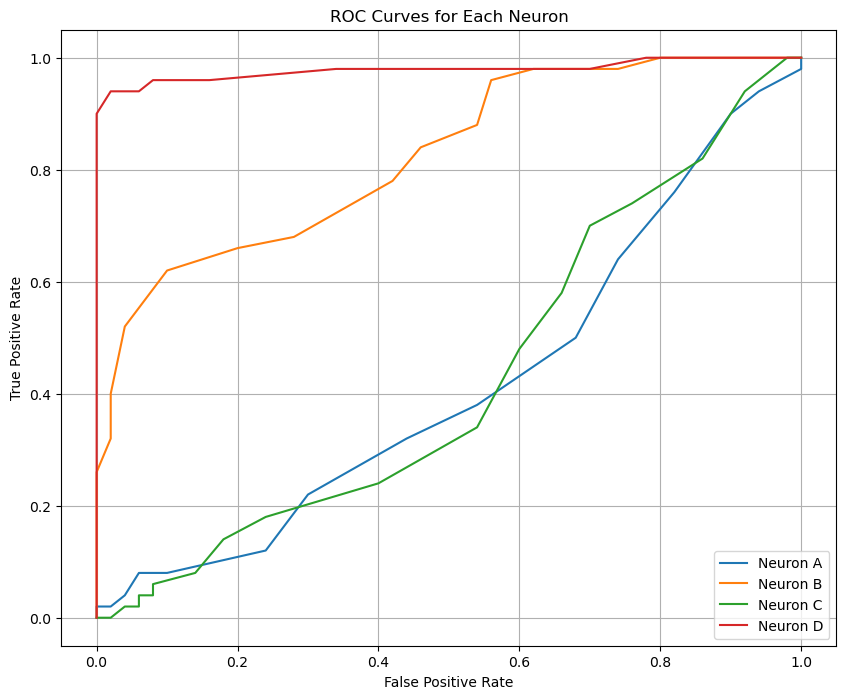

In [60]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 8))
for neuron in tpr_dict:
    plt.plot(fpr_dict[neuron], tpr_dict[neuron], label=f'Neuron {neuron}')

plt.title('ROC Curves for Each Neuron')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()
